# HOUSING: PRICE PREDICTION   

# Problem Statement:-


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing compan.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Import all the required library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing DataSet:-

In [25]:
#import train dataset
df=pd.read_csv(r'C:\train.csv') #Reading csv file
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [6]:
print('This train dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This train dataset has 1168 observations with 81 features.


In [10]:
#importing test dataset
dff=pd.read_csv(r"C:\test.csv") #Reading csv file
dff

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [11]:
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [12]:
print('This test dataset has {} observations with {} features.'.format(dff.shape[0], dff.shape[1]))

This test dataset has 292 observations with 80 features.


# EDA:-

In [13]:
df.shape

(1168, 81)

In our training dataset i have 1168 rows and 81 columns

In [15]:
dff.shape

(292, 80)

in our testing dataset i have 292 columns and 80 columns

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

these are the column names of the train dataset.

In [17]:
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

these are the columns of the testing dataset

In [18]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

As we can see in my train dataset i have int,object and float data types are present.

In [20]:
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

here also we can see in my test dataset i have int, object as well as flaot data types are present.

In [21]:
#info about train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [22]:
#i have to delete that too much contain null value columns

In [26]:
#Dropping unnecessary columns in train dataset
df=df.drop(["Alley"],axis=1)
df=df.drop(["PoolQC"],axis=1)
df=df.drop(["Fence"],axis=1)
df=df.drop(["MiscFeature"],axis=1)

In [27]:
df.shape

(1168, 77)

As we can see we have 77 columns now from 81 columns

In [28]:
#info about testing dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [29]:
#Dropping unnecessary columns in test dataset
dff=dff.drop(["Alley"],axis=1)
dff=dff.drop(["PoolQC"],axis=1)
dff=dff.drop(["Fence"],axis=1)
dff=dff.drop(["MiscFeature"],axis=1)

In [30]:
dff.shape

(292, 76)

In [31]:
#Checking unique values
df.nunique

<bound method DataFrame.nunique of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     127         120       RL          NaN     4928   Pave      IR1   
1     889          20       RL         95.0    15865   Pave      IR1   
2     793          60       RL         92.0     9920   Pave      IR1   
3     110          20       RL        105.0    11751   Pave      IR1   
4     422          20       RL          NaN    16635   Pave      IR1   
...   ...         ...      ...          ...      ...    ...      ...   
1163  289          20       RL          NaN     9819   Pave      IR1   
1164  554          20       RL         67.0     8777   Pave      Reg   
1165  196         160       RL         24.0     2280   Pave      Reg   
1166   31          70  C (all)         50.0     8500   Pave      Reg   
1167  617          60       RL          NaN     7861   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl   

in Id column we can see the unique count is 1168 which means all the values in the column are unique so i can drop this column.

In Utilities column unique value count is 1 which means all the entries are same.So i have to drop this column also

In [32]:
#Droping those columns in train dataset
df=df.drop(["Id"],axis=1)
df=df.drop(["Utilities"],axis=1)

In [34]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 76, dtype: int64

As like our train dataset here also same lots of unique value present in id column.and utilities has 1 unique value soo i hav eto delete those columns

In [35]:
#Droping those columns in test dataset
dff=dff.drop(["Id"],axis=1)
dff=dff.drop(["Utilities"],axis=1)

Check value counts:-

In [36]:
#for train dataset
for i in df.columns:
        print(df[i].value_counts())
        print('******************************')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
******************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
******************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
******************************
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
******************************
Pave    1164
Grvl       4
Name: Street, dtype: int64
******************************
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
******************************
Lvl    1046
Bnk      50
HLS

In [37]:
#Dropping those columns in train dataset
df.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [38]:
df.shape

(1168, 68)

We can see all those columns havebeen deleted

In [39]:
#for test dataset
for i in dff.columns:
        print(dff[i].value_counts())
        print('******************************')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
******************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
******************************
60.0    32
85.0    14
50.0    13
70.0    12
21.0     9
        ..
77.0     1
71.0     1
59.0     1
36.0     1
69.0     1
Name: LotFrontage, Length: 65, dtype: int64
******************************
7200     7
1680     4
5400     3
8450     3
9600     3
        ..
8280     1
9735     1
6979     1
12822    1
1953     1
Name: LotArea, Length: 249, dtype: int64
******************************
Pave    290
Grvl      2
Name: Street, dtype: int64
******************************
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
******************************
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
**

Here also same scenario as well as train dataset.
-Here also i have to delete these columns BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal.

In [40]:
#Dropping these columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [41]:
dff.shape

(292, 67)

We can see successfully drop those columns

# Checking Null Values:-

In [43]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 68, dtype: int64

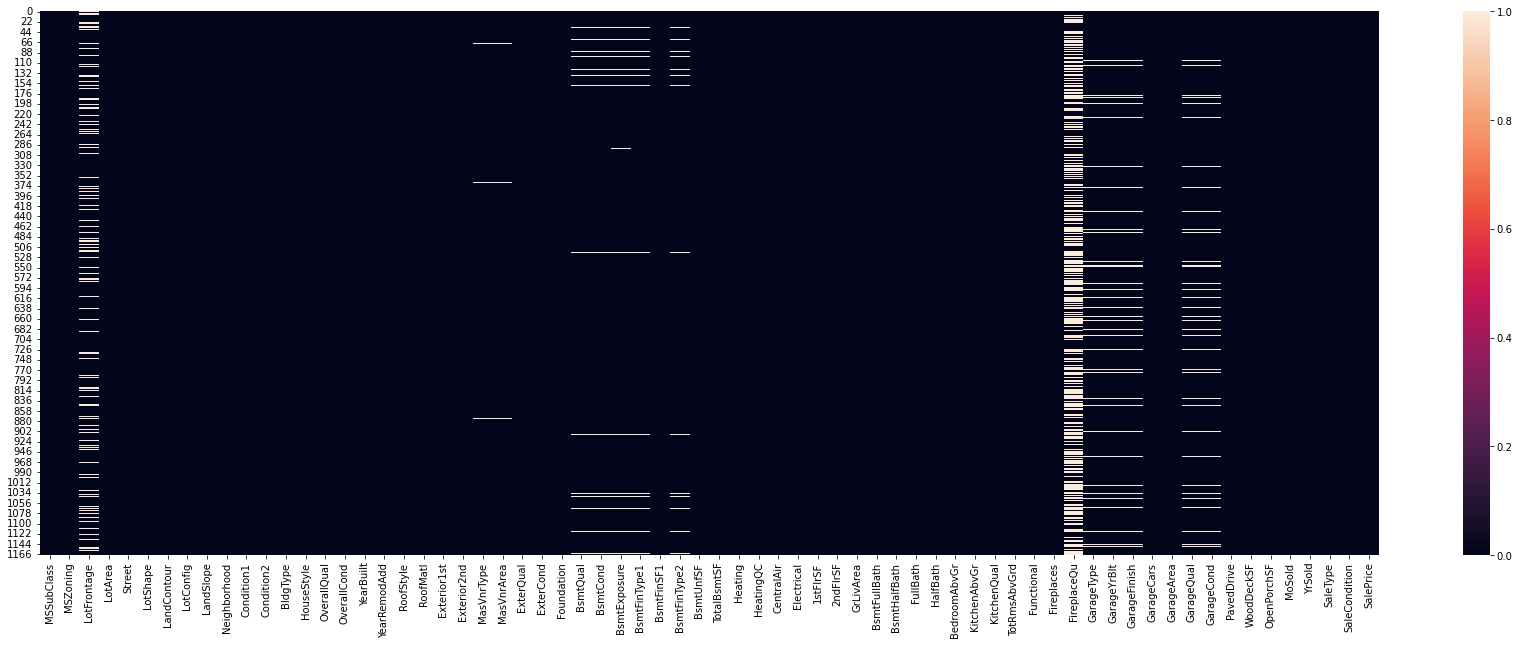

In [45]:
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.show()

In [46]:
dff.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
OpenPorchSF       0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 67, dtype: int64

<AxesSubplot:>

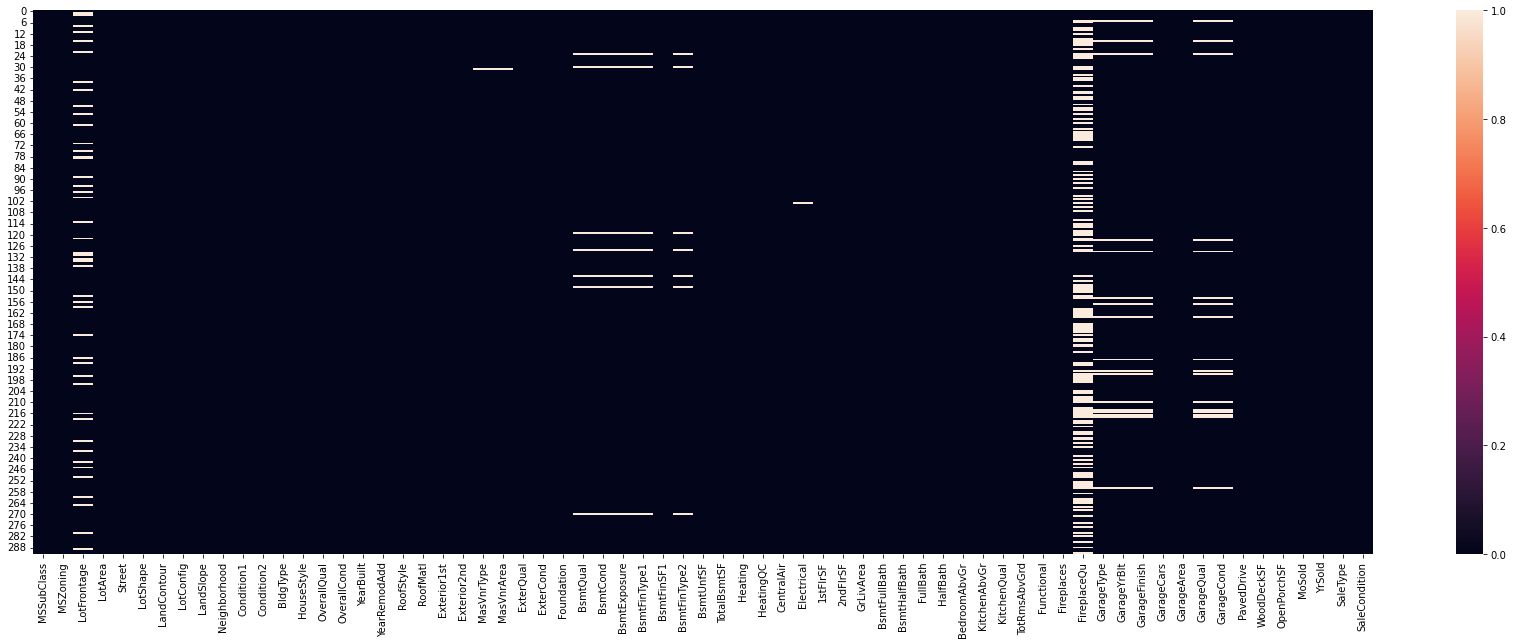

In [47]:
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())

Here also we have null values are present

# Find catagorical & numerical data And imputation technique to replace NaN values:-

In [49]:
#for train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [52]:
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

Replaced all null values in categorical columns in  train dataset

In [53]:
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

Replaced all null values in numerical columns in train dataset

In [66]:
#for test

In [54]:
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [55]:
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

Replaced all null values in categorical columns in test dataset

In [56]:
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

Replaced all null values in numerical columns in test dataset

In [57]:
#Now again i have to check whether there is any null value present or not

In [58]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 68, dtype: int64

In [59]:
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 67, dtype: int64

<AxesSubplot:>

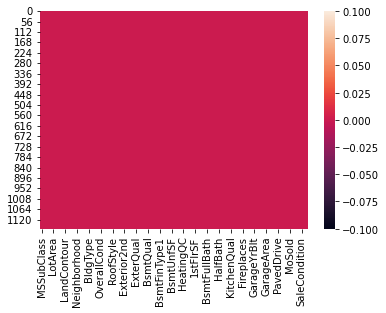

In [60]:
sns.heatmap(df.isnull())

<AxesSubplot:>

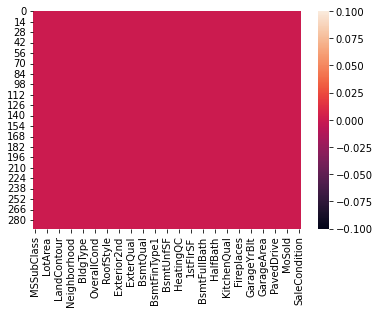

In [61]:
sns.heatmap(dff.isnull())

Now we can see there is no null values are present now

In [63]:
df['SalePrice'].unique()

array([128000, 268000, 269790, 190000, 215000, 219210, 121500, 155000,
       140000, 118500, 119500, 237000, 201000, 126500, 135500, 165000,
       120500, 194500, 148000, 106000, 231500, 133000, 142125, 136500,
       146000, 217000, 112000, 394432, 113000, 188700, 319900, 135000,
       128500, 169000, 122000, 152000, 243000, 156000,  79500, 132000,
       144152, 130000, 149900, 124500, 179000, 147000,  39300, 312500,
       256000,  60000, 153000,  84900, 230000, 180000, 106500, 239000,
       107500, 123000, 176000, 228500, 117500, 350000, 200624, 173000,
       225000,  84500, 174900,  79000, 297000,  87000, 465000, 204900,
       127000, 159000, 170000, 159500, 102000, 109500, 163990, 189950,
       119000, 157500, 287000, 144000, 286000, 172000, 212000, 124000,
       150000, 205950, 251000, 129000, 223500, 475000, 335000, 115000,
       205000, 209500, 176432, 171000, 302000, 259500, 141000, 187500,
       385000, 275000, 108000,  89500, 109900, 185000, 143000, 127500,
      

In [65]:
df.loc[df['SalePrice'] == " "]   #checking empty space

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 68 columns]

As we know this is our target column and there is no empty space is there

# Feature Engineering:-

In [66]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SaleT

In [69]:
#For Train dataset

# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [ ]:
#now i have to drop those old columns
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [72]:
#for test dataset

# Converting years column to age column
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [ ]:
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

here i am successfully convert year column to age column

# Data Description:-

In [75]:
#for train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445  ...   
std     182.047152   462.664785   449.375525   442.272249   391.161983  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   216.000000   799.000000   892.000000  ...   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000  ...   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.000000        3.000000   
max    755000.000000       135.000000             60.000000        4.000000   

         GarageAge  
count  1168.000000  
mean     31.806159  
std      24.198559  
min       0.000000  
25%       9.000000  
50%      31.806159  
75%      48.000000  
max     110.000000  

[8 rows x 30 columns]

In [76]:
#for test
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count   292.000000   292.000000   292.000000   292.000000   292.000000  ...   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781  ...   
std     174.729023   429.559675   411.043768   424.561153   366.941919  ...   
min       0.000000     0.000000     0.000000     0.000000   372.000000  ...   
25%       0.000000     0.000000   255.000000   771.750000   858.000000  ...   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000  ...   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000  ...   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000  ...   

       Fireplaces  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count  292.000000  292.000000   292.000000  292.000000   292.000000   
mean     0.595890    1.729452   457.458904   86.397260    47.061644   
std      0.621259    0.754430   210.785591  121.898836    65.865449   
min      0.000000    0.000000     0.000000    0.000000     0.000000   
25%      0.000000    1.000000   300.000000    0.000000     0.000000   
50%      1.000000    2.000000   467.500000    0.000000    28.500000   
75%      1.000000    2.000000   569.750000  149.250000    66.000000   
max      2.000000    4.000000  1052.000000  728.000000   418.000000   

           MoSold  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count  292.000000       292.000000            292.000000      292.000000   
mean     6.232877        36.383562             24.705479        2.140411   
std      2.774556        30.447016             20.105792        1.322867   
min      1.000000         0.000000              0.000000        0.000000   
25%      4.000000         8.000000              6.750000        1.000000   
50%      6.000000        33.000000             16.000000        2.000000   
75%      8.000000        55.000000             42.000000        3.000000   
max     12.000000       137.000000             60.000000        4.000000   

        GarageAge  
count  292.000000  
mean    30.240000  
std     23.161183  
min      0.000000  
25%      8.000000  
50%     30.240000  
75%     45.000000  
max     94.000000  

[8 rows x 29 columns]

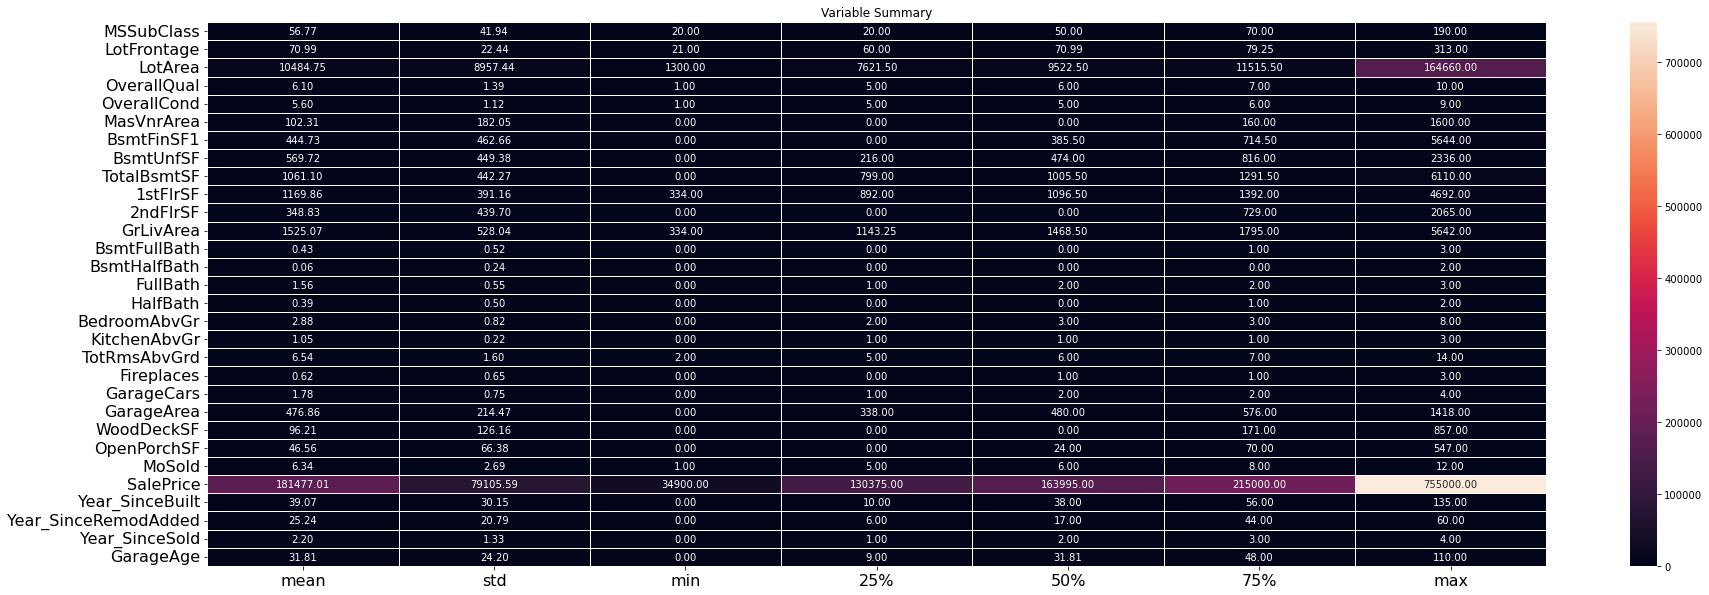

In [77]:
plt.figure(figsize=(30,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Variable Summary')
plt.show()

# Visualization:-

In [78]:
#for train dataset

In [82]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [84]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


In [102]:
#for test dataset

In [86]:
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [88]:
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


# For Numerical columns:-

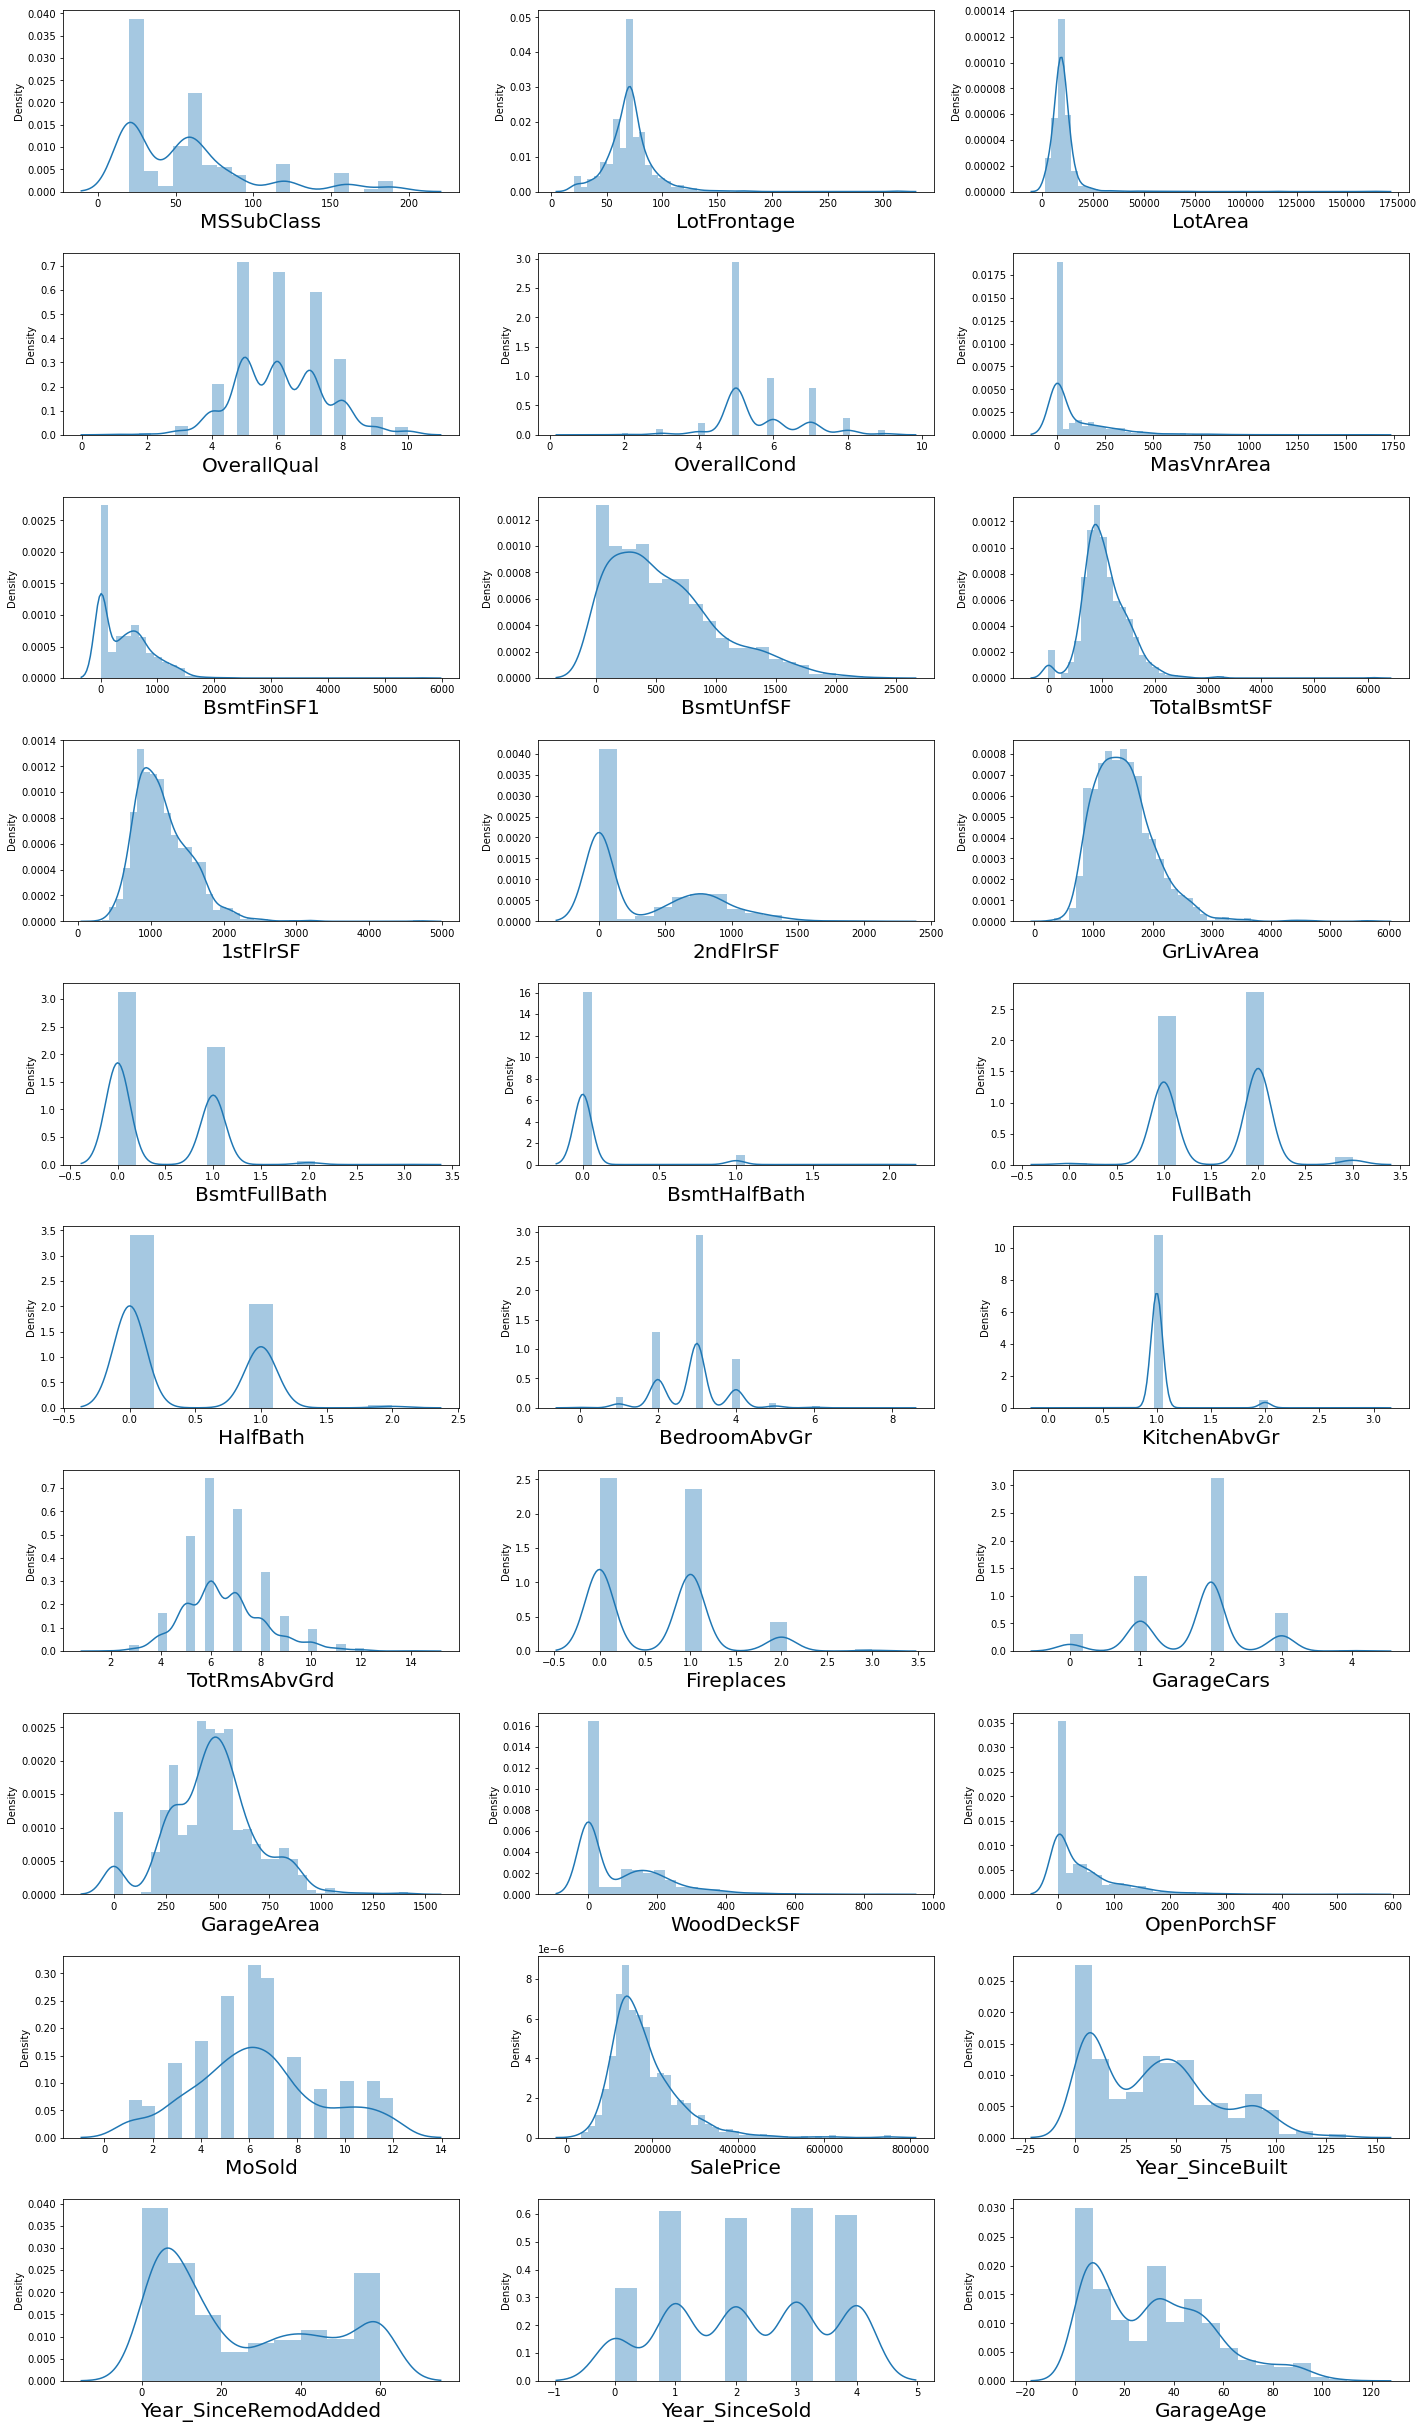

In [90]:
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

As we can see there is skewness in almost all numerical columns.I have to remove this skewness.

# Univariate analysis for categorical columns:-

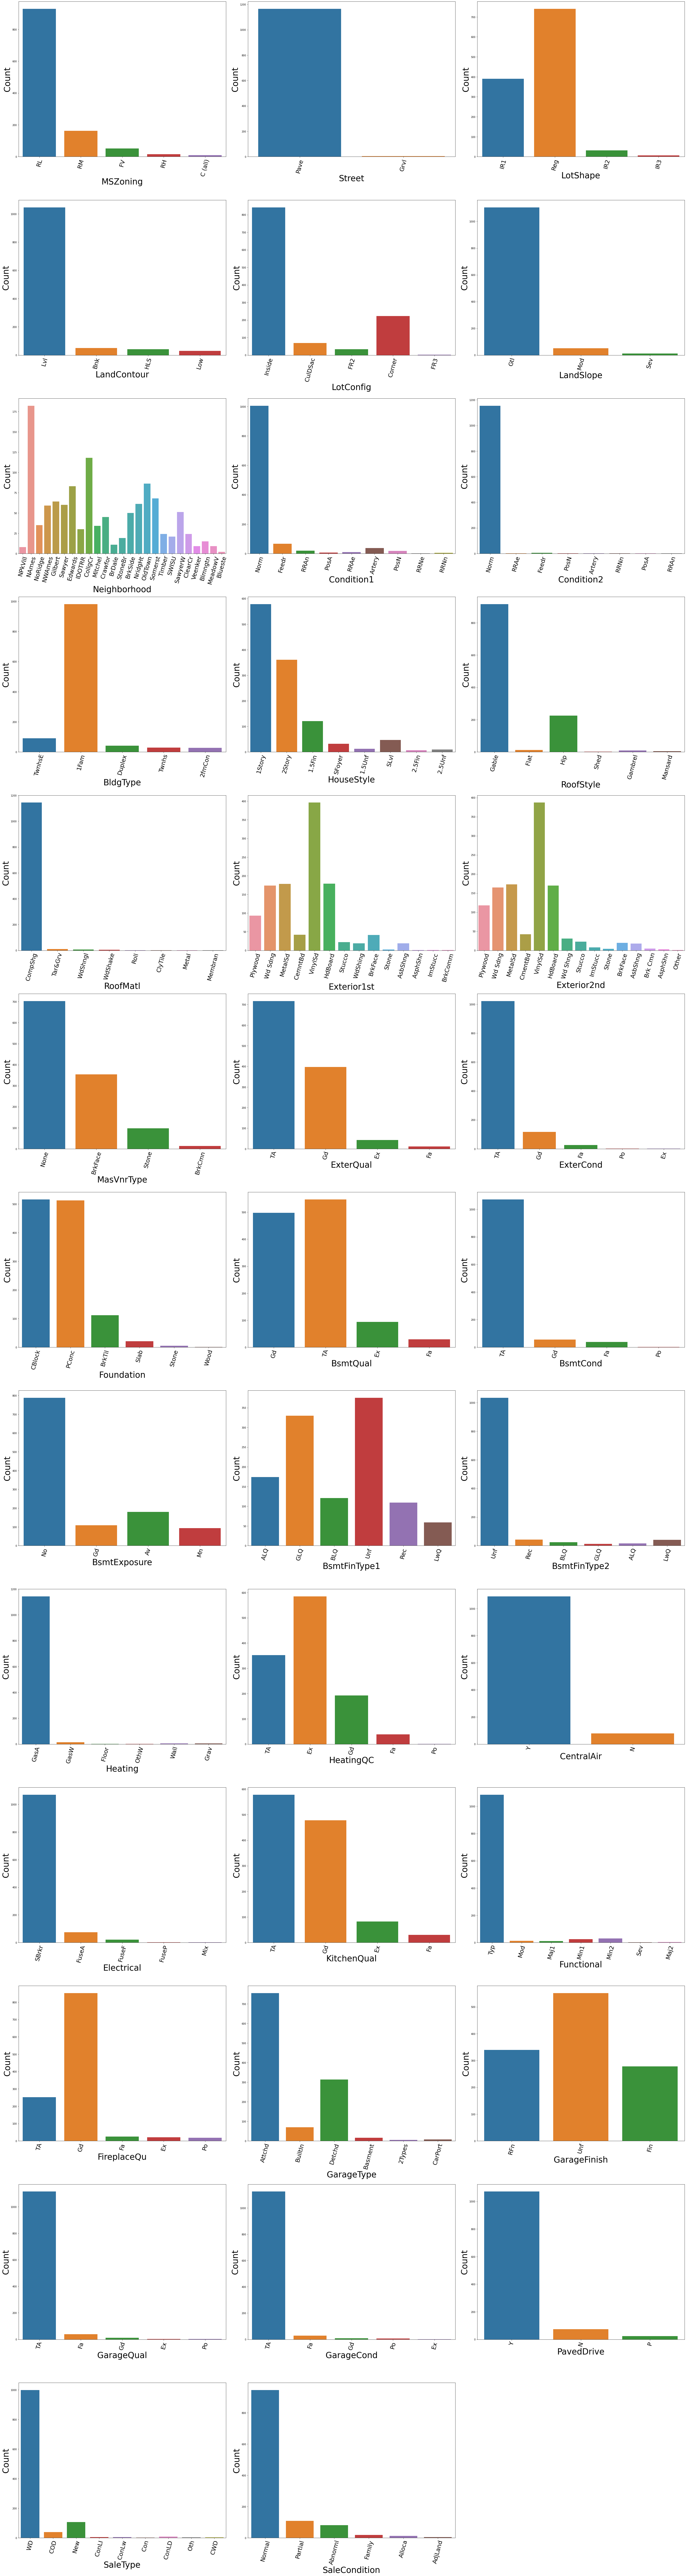

In [92]:
plt.figure(figsize=(40,150))
plotnumber=1
for column in df[categorical_columns]:
    if plotnumber<=40:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=75,fontsize = 25)
        plt.xlabel(column,fontsize = 35)
        plt.ylabel('Count',fontsize = 35)
    plotnumber+=1
plt.tight_layout()

# Observations:-

# Bivariate Analysis:-

In [95]:
#for numeric column:-

In [97]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']

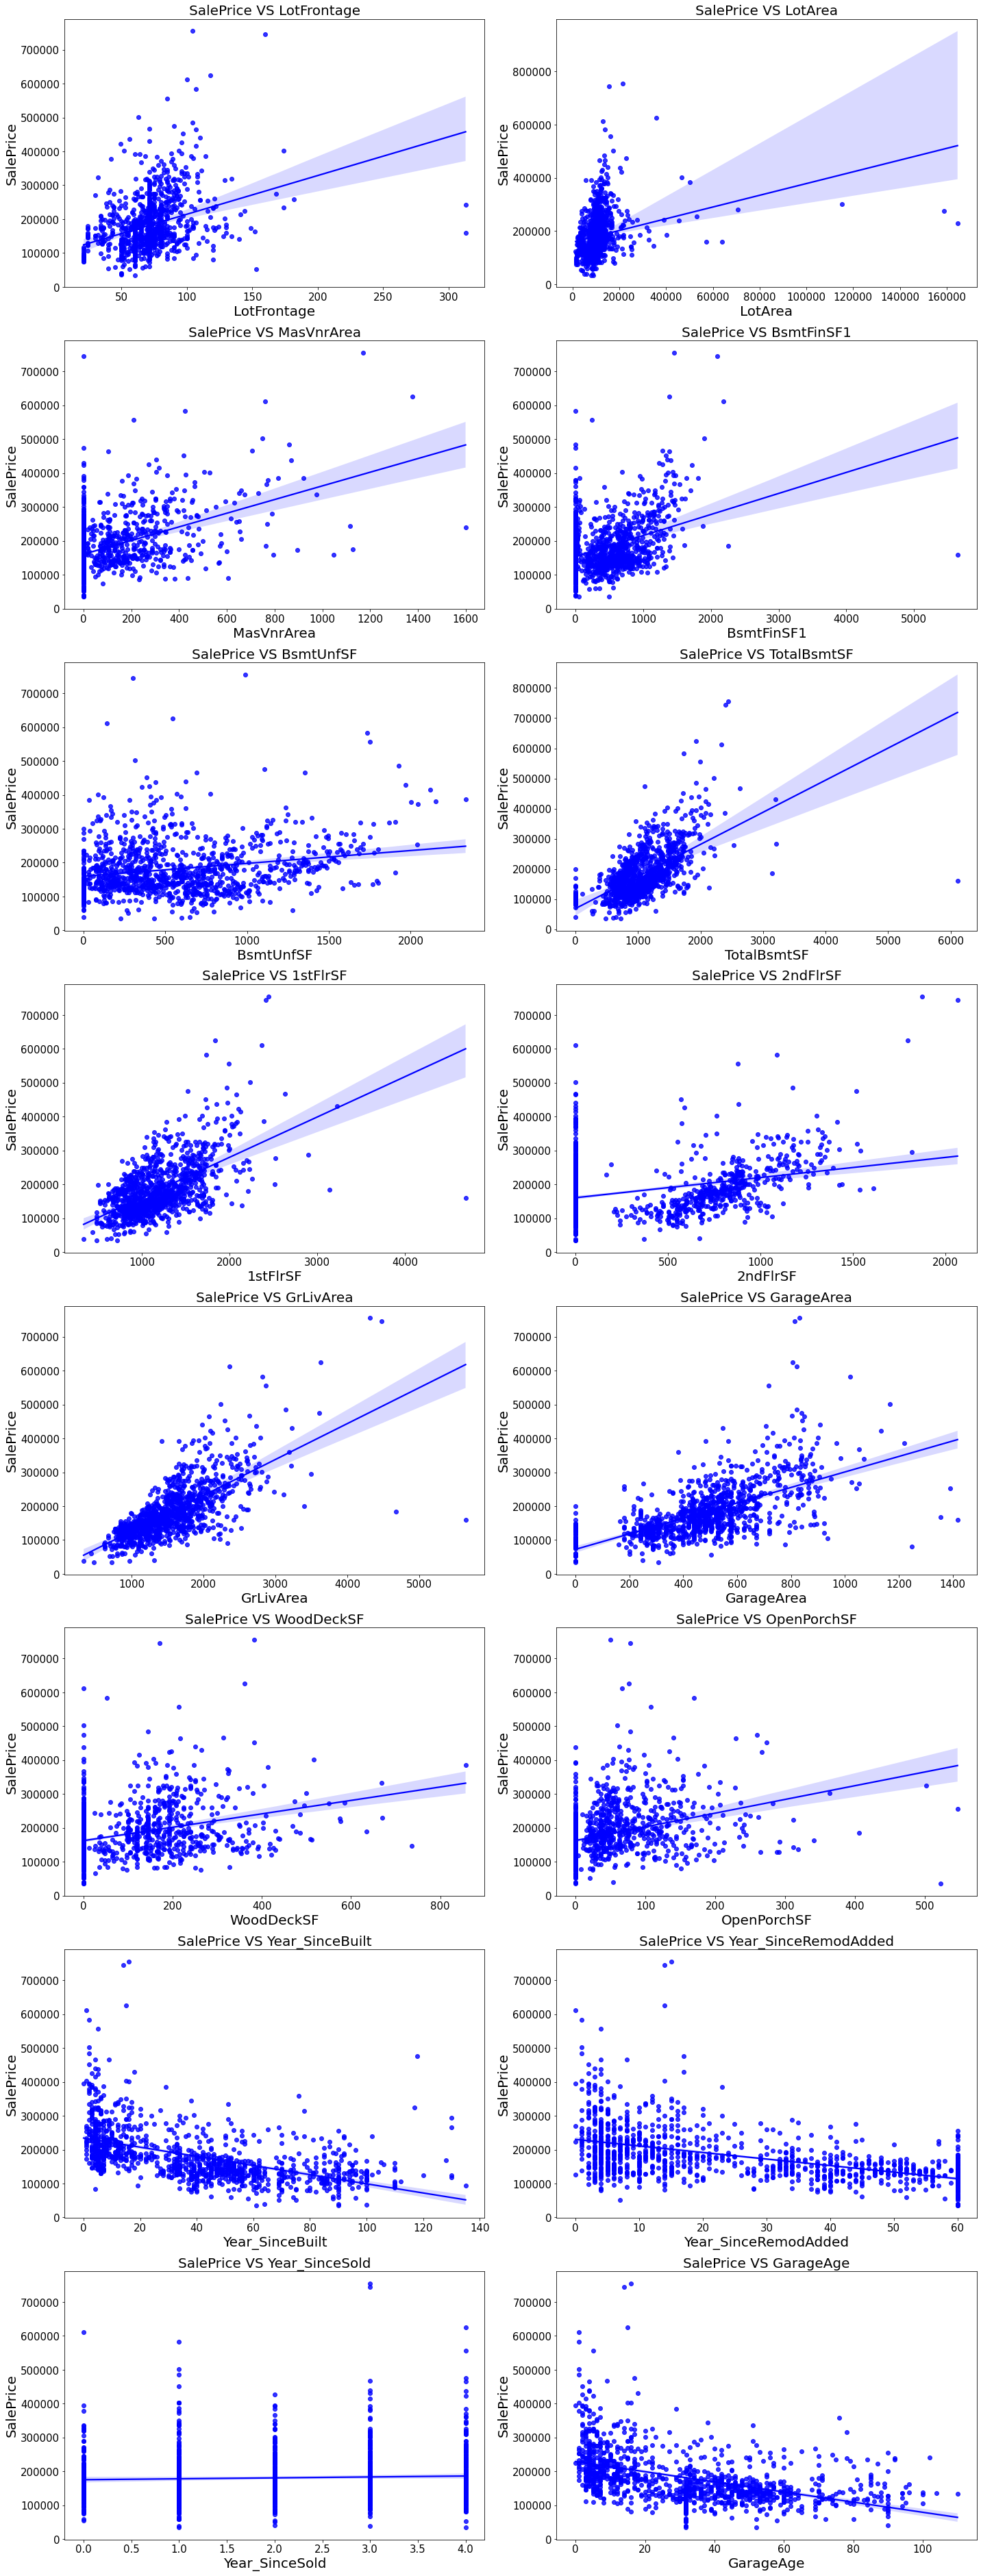

In [99]:
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="b")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

# Observations:-

In [101]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']

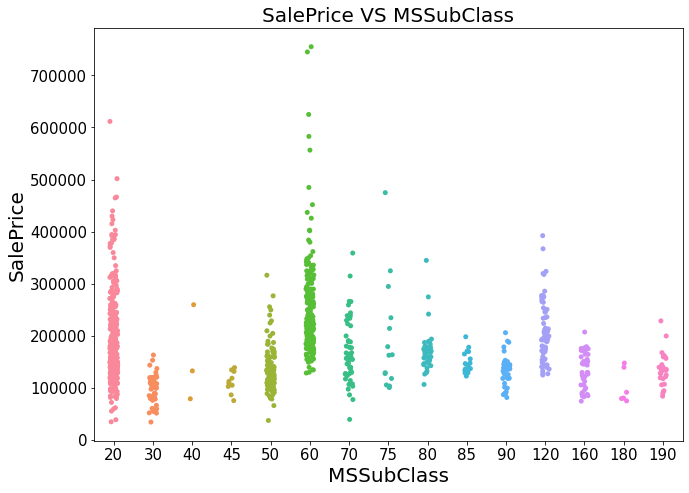

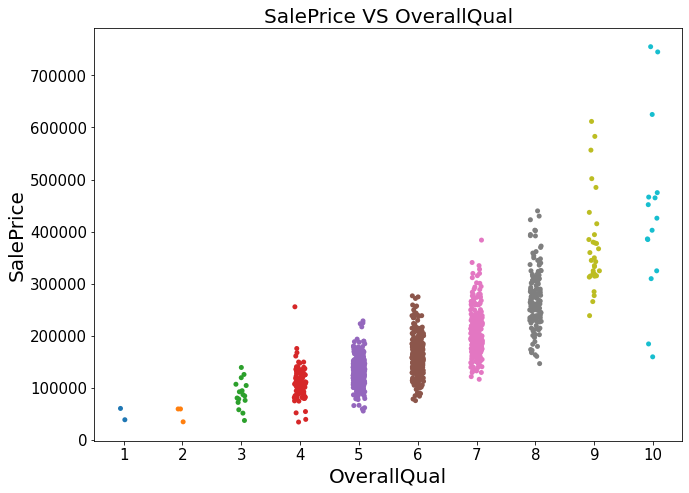

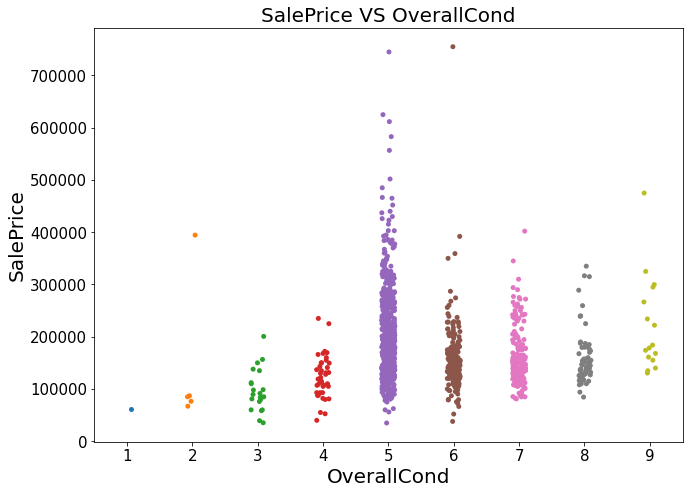

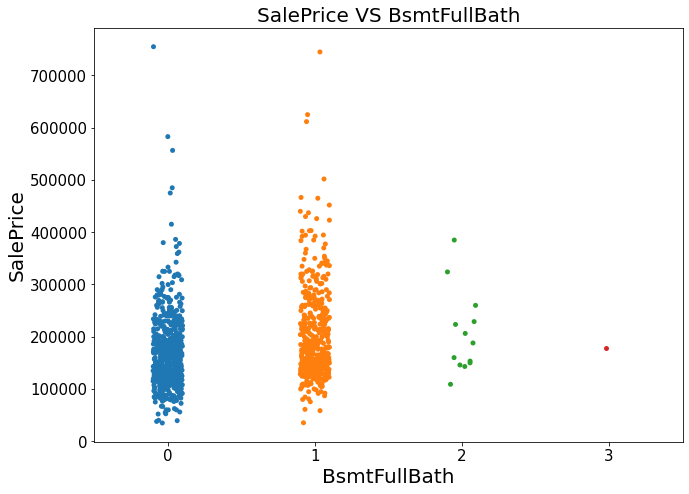

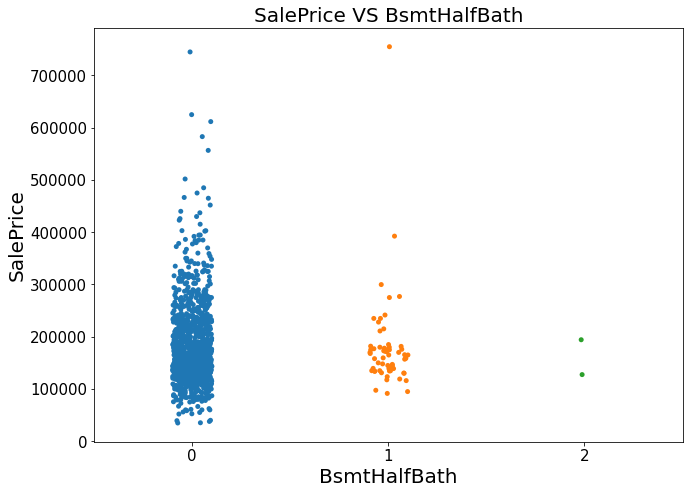

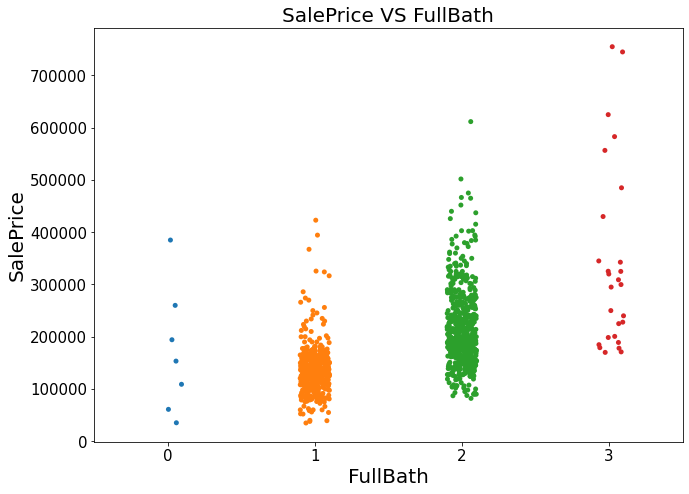

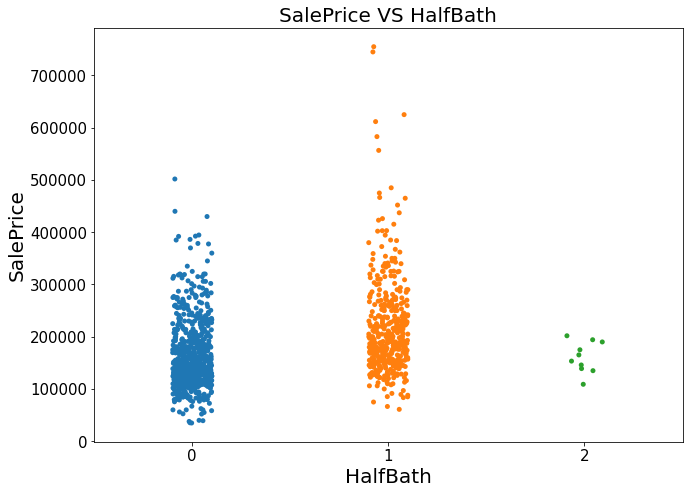

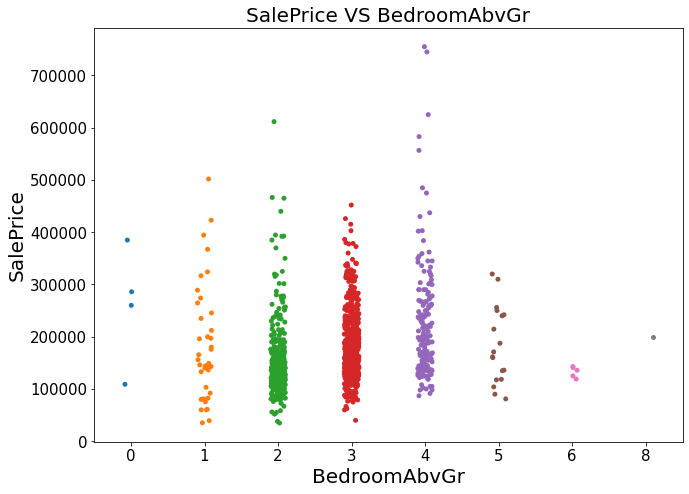

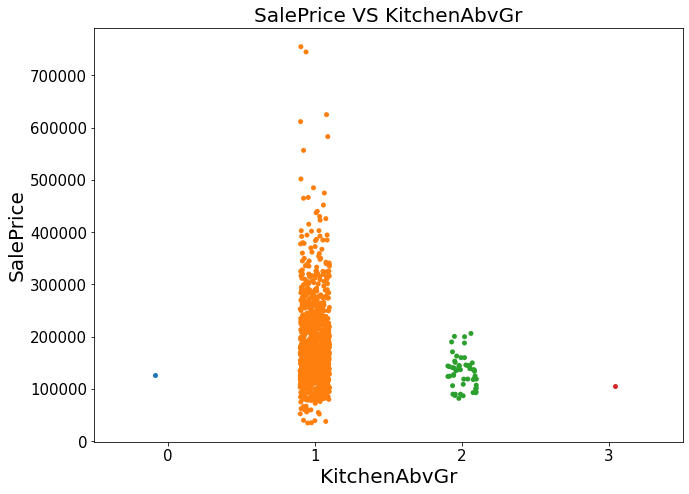

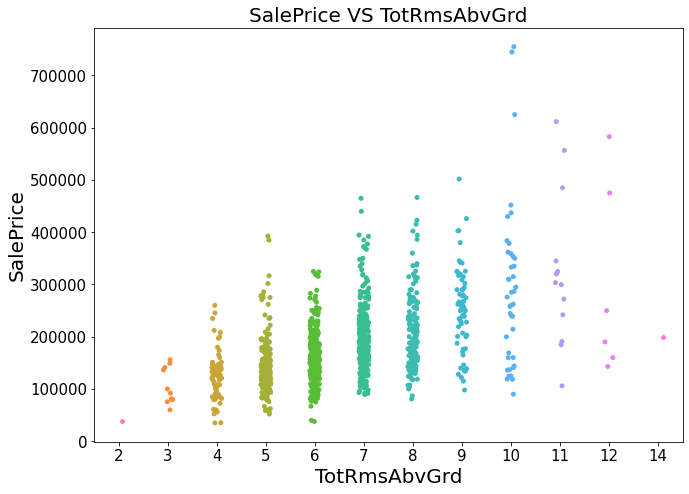

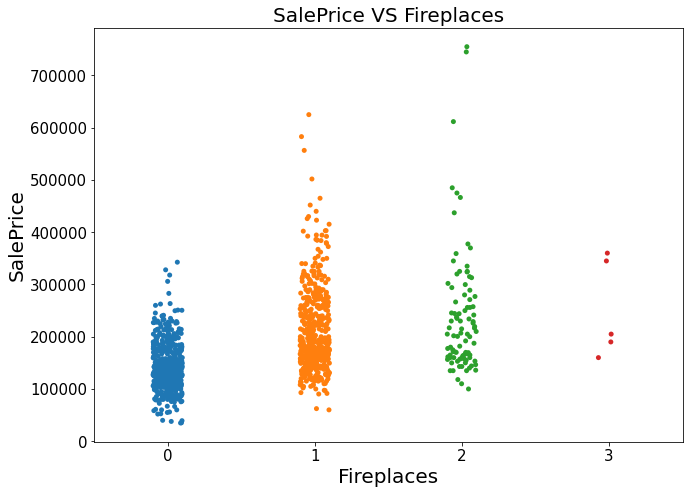

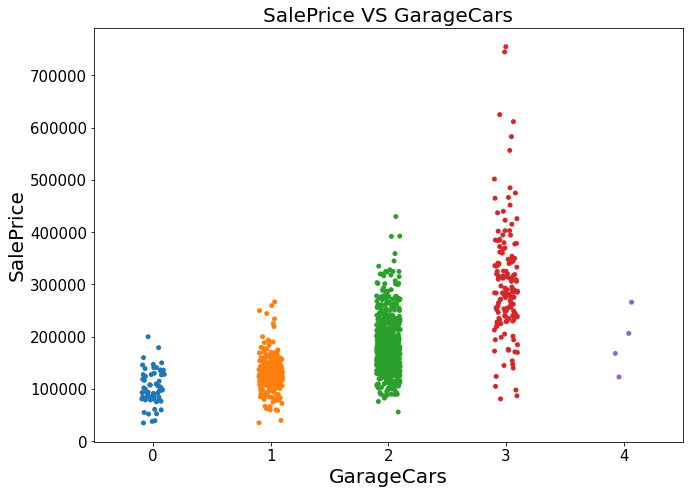

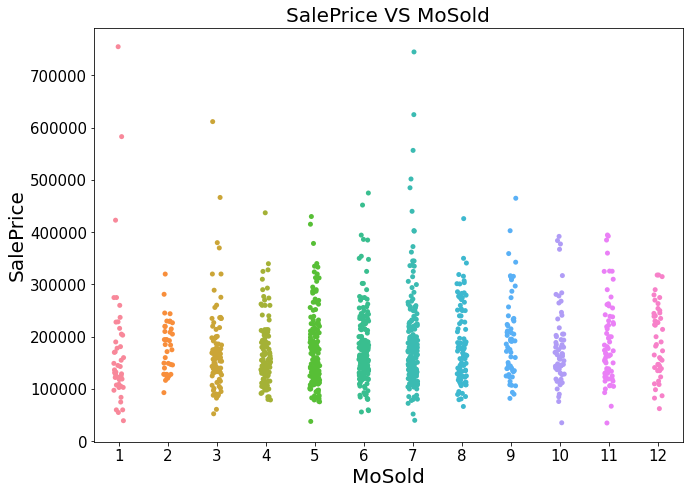

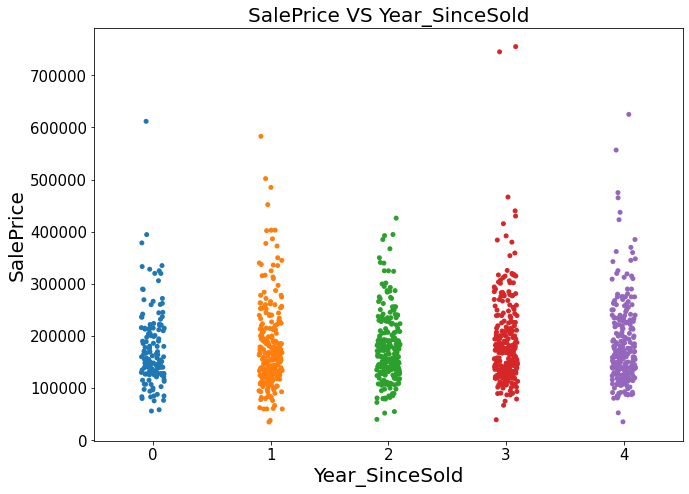

In [103]:
for i in range(len(col1)):
    plt.figure(figsize=(18,130))
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

# Observations:-

# Bivariate Analysis for Categorical Columns:-

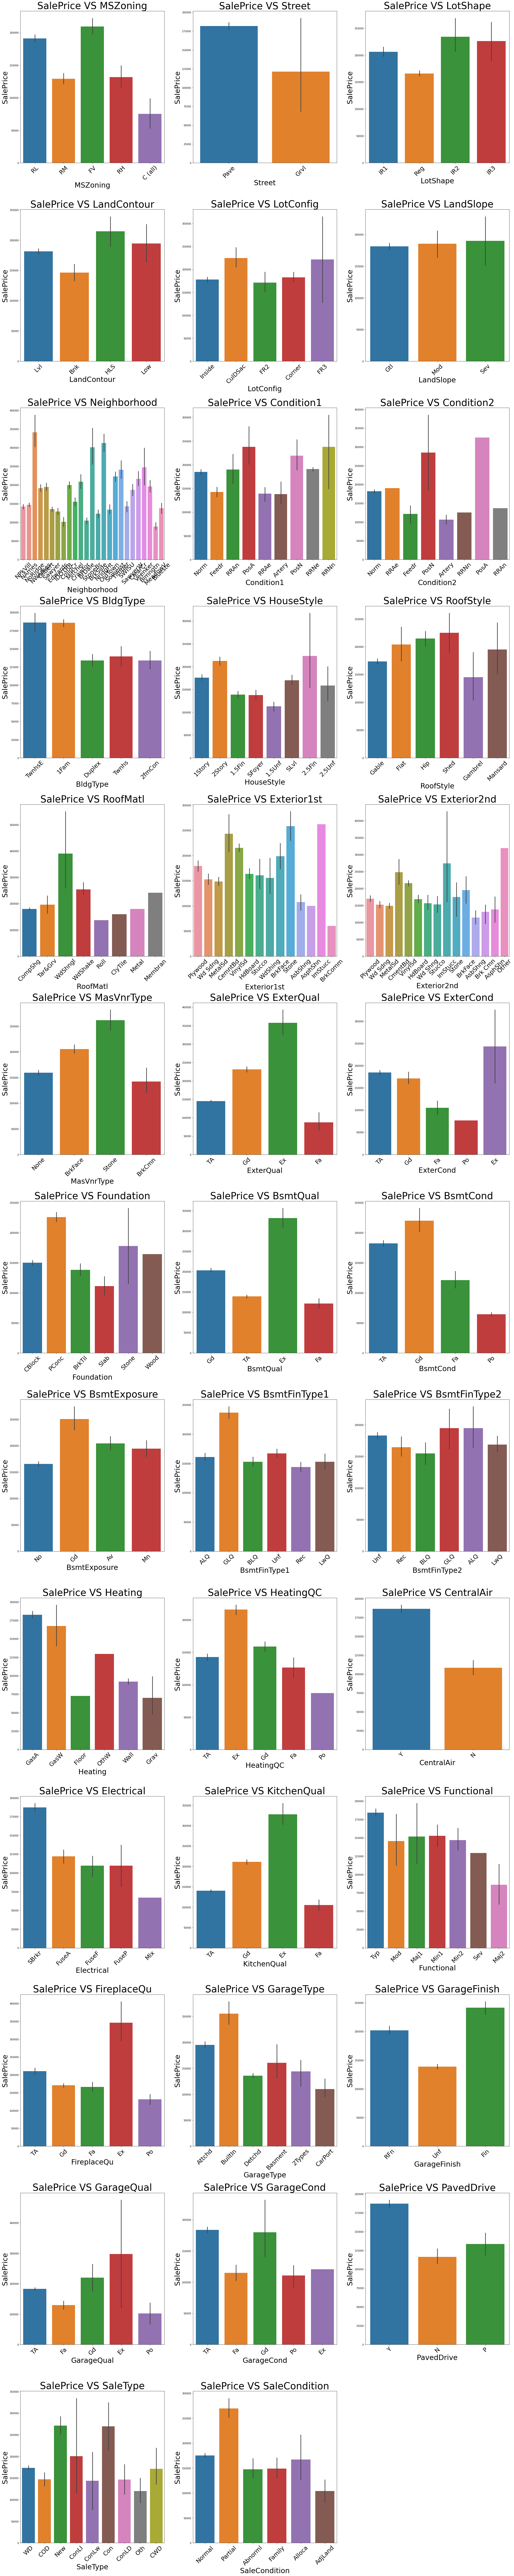

In [105]:
plt.figure(figsize=(30,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=45,fontsize=25)  
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

# Observations:-

# Checking for outliers:-

In [106]:
#For Train dataset

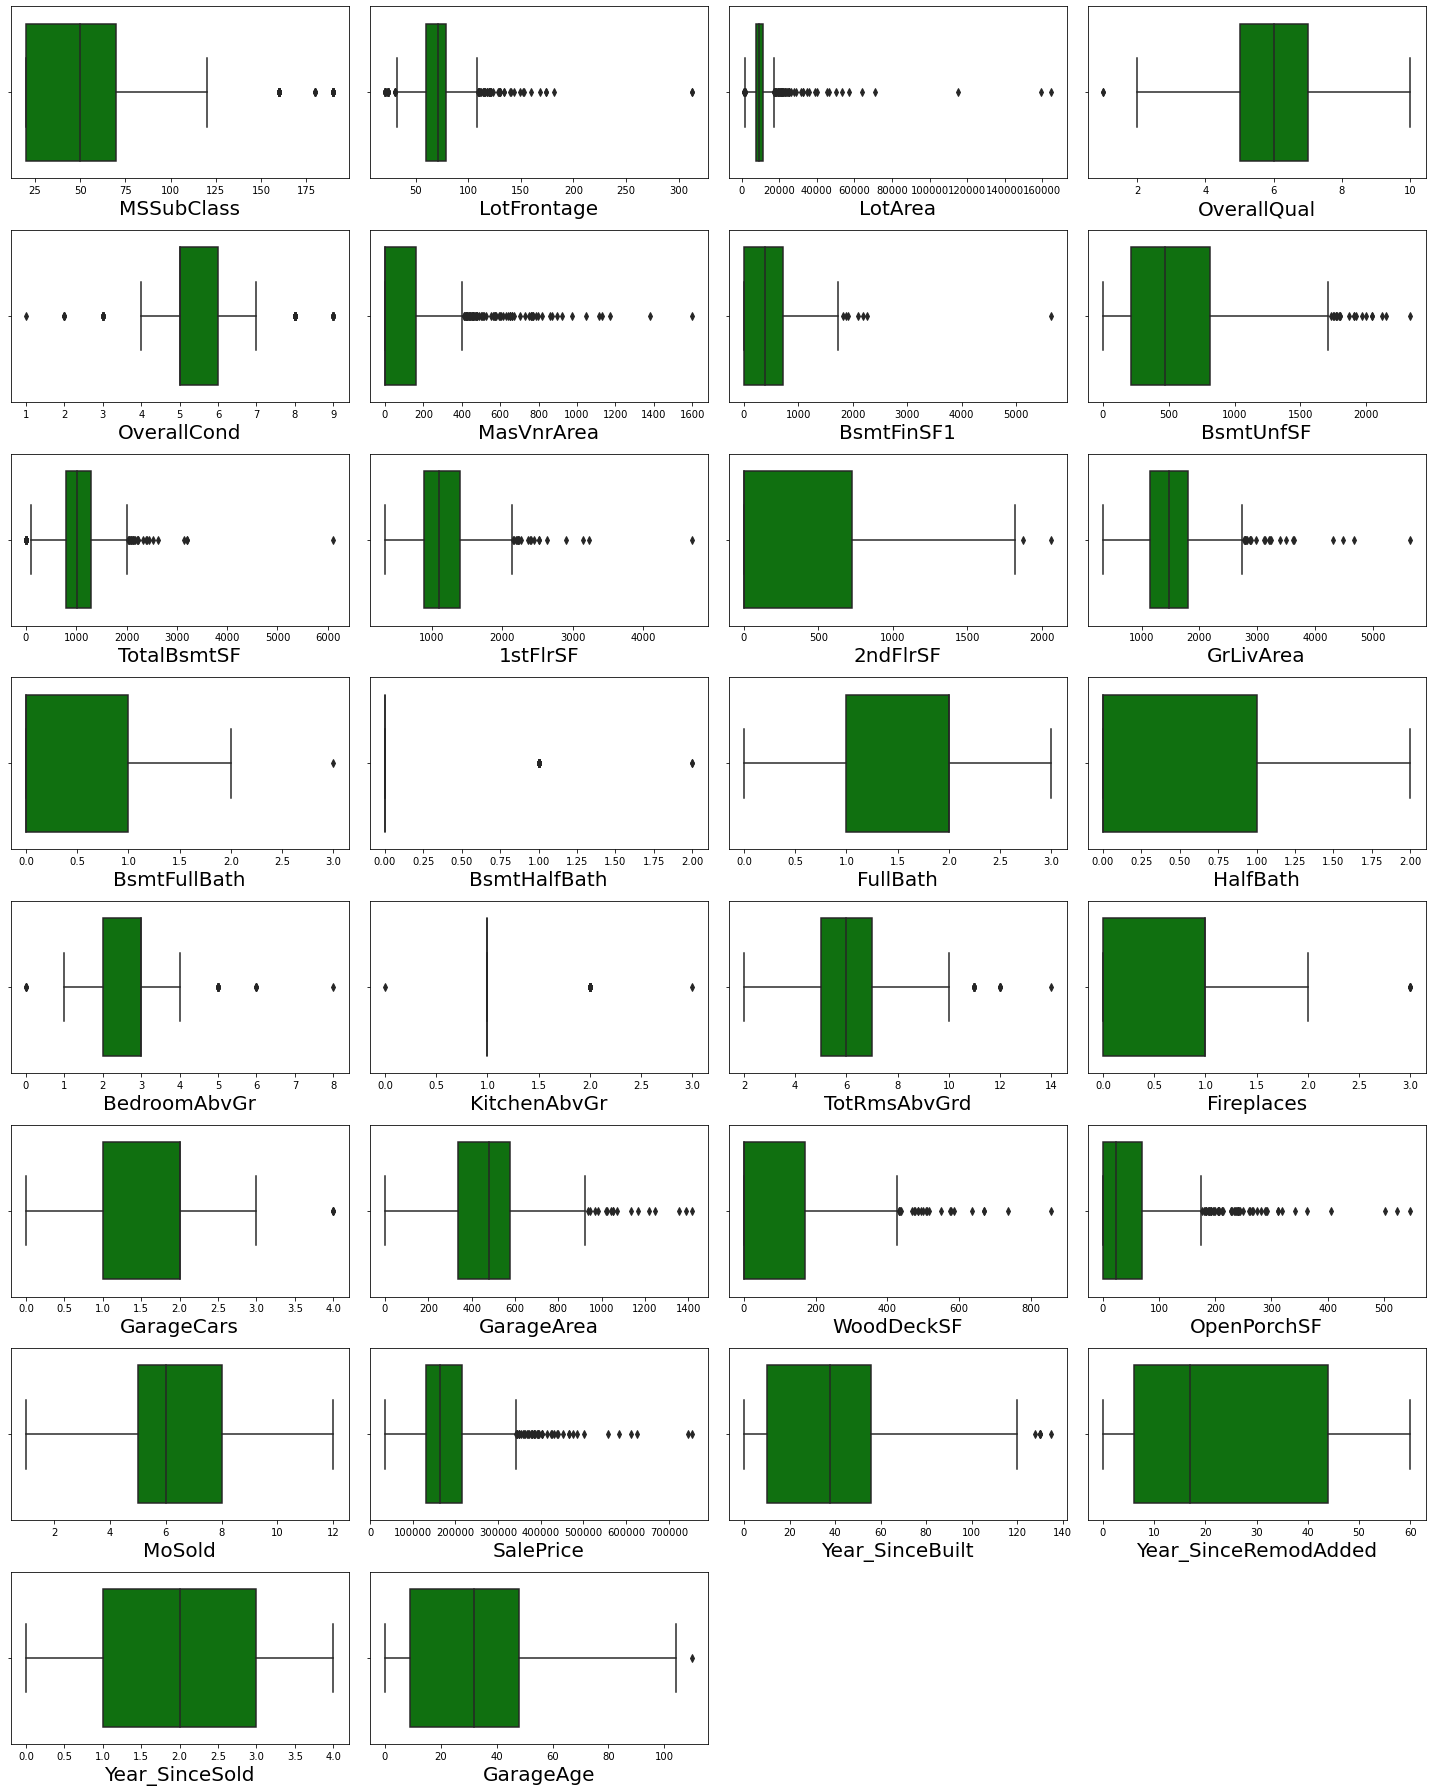

In [108]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

SalePrice is my target i should not remove outliers from this column.And MSSubClass, OverallQual and OverallCond are seems to be categorical so let me not remove outliers in this columns.

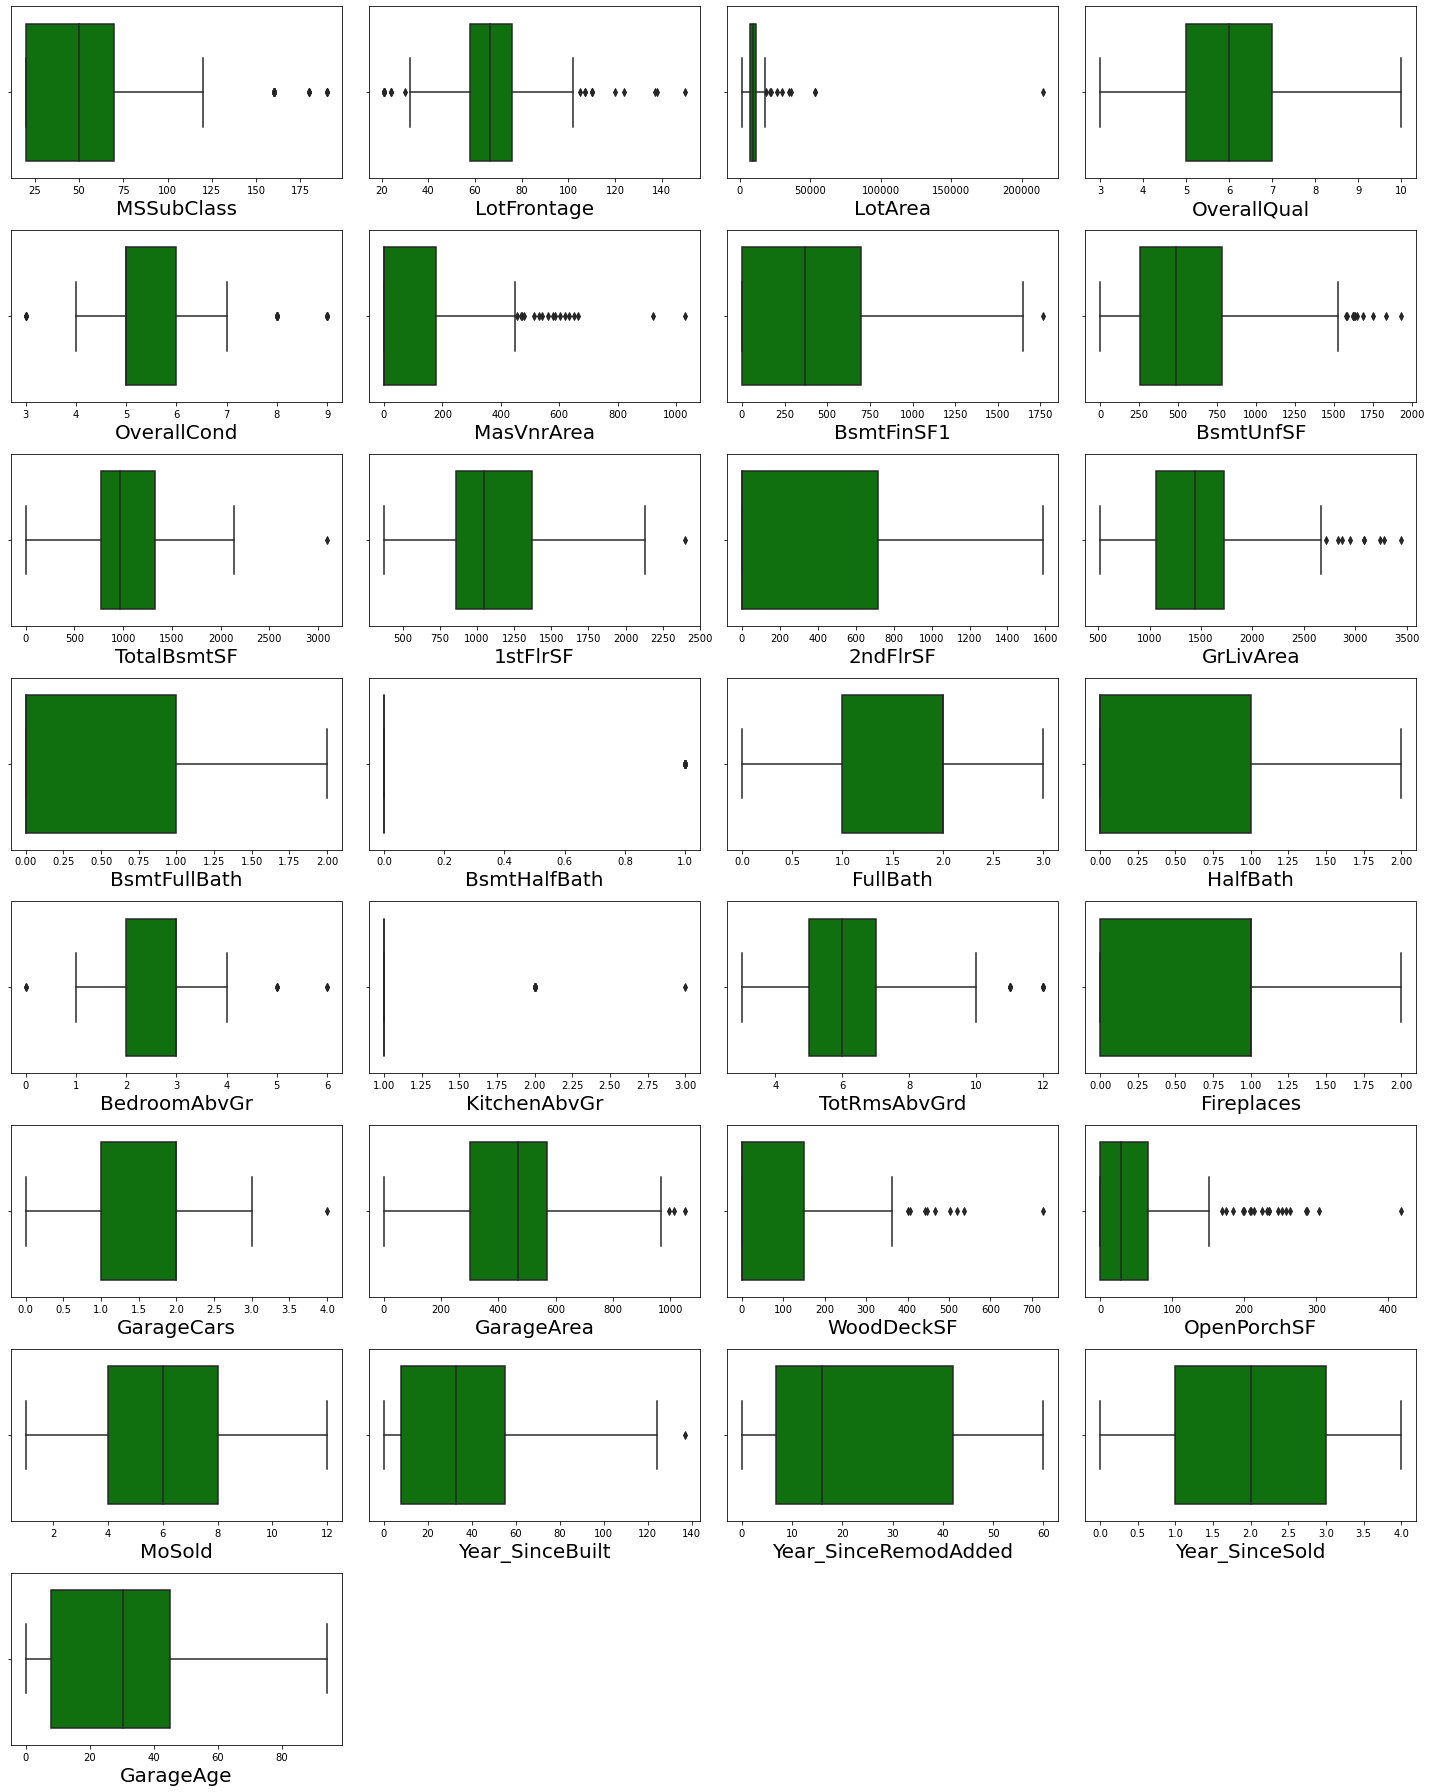

In [109]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers:-

In [110]:
#For Train Dataset

In [112]:
features=df[['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
           'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
           'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
           'WoodDeckSF', 'OpenPorchSF', 'Year_SinceBuilt','GarageAge']]

Above are the list of columns with outliers in train dataset.

In [113]:
from scipy.stats import zscore

In [114]:
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF MoSold  \
0    Inside       Gtl      NPkVill  ...          0         205      2   
1    Inside       Mod        NAmes  ...         81         207     10   
2   CulDSac       Gtl      NoRidge  ...        180         130      6   
3    Inside       Gtl       NWAmes  ...          0         122      1   
5    Inside       Gtl      Gilbert  ...        100          17     11   

  SaleType  SaleCondition  SalePrice Year_SinceBuilt Year_SinceRemodAdded  \
0       WD         Normal     128000              34                   34   
1       WD         Normal     268000              40                   40   
2       WD         Normal     269790              14                   13   
3      COD         Normal     190000              33                   33   
5      New        Partial     219210               4                    4   

  Year_SinceSold GarageAge  
0              3      33.0  
1              3      40.0  
2              3      13.0  
3              0      33.0  
5              4       4.0  

[5 rows x 68 columns]

In [115]:
df_new.shape

(951, 68)

In [116]:
df.shape

(1168, 68)

As we can see we are removing outliers.

# % of dataloss:-

In [117]:
Dataloss = (((1168-951)/1168)*100)
Dataloss

18.57876712328767

here we can see the dataloss is more than 10% so we have to check another methods.

# ii) IQR (Inter Quantile Range) mathod:-

In [118]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
df_1.shape

(779, 68)

In [120]:
df.shape

(1168, 68)

Here also we can see we lost soo much of data.

# % of dataloss:-

In [121]:
Dataloss = (((1168-779)/1168)*100)
Dataloss

33.30479452054795

In IQR method of train dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:-

In [122]:
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

Here we are successfully removed outliers by using Percentile method

# Removing Outliers in test dataset:-

# i) Zscore method:-

In [124]:
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
                   '1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr',
                   'TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                   'Year_SinceBuilt']]

In [125]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
0    Corner       Gtl      StoneBr  ...          Y        178          51   
1   CulDSac       Gtl      StoneBr  ...          Y         63           0   
2    Inside       Gtl      CollgCr  ...          Y        202         151   
3    Inside       Gtl      Crawfor  ...          Y          0           0   
4   CulDSac       Gtl      Somerst  ...          Y        100          18   

  MoSold  SaleType  SaleCondition Year_SinceBuilt Year_SinceRemodAdded  \
0      7        WD         Normal               4                    4   
1      8       COD        Abnorml              25                   26   
2      6        WD         Normal               8                    9   
3      7        WD         Normal              68                   60   
4      1        WD         Normal               2                    3   

  Year_SinceSold GarageAge  
0              3       5.0  
1              1      26.0  
2              1       9.0  
3              1      69.0  
4              2       3.0  

[5 rows x 67 columns]

In [126]:
dff_new.shape

(235, 67)

In [127]:
dff.shape

(292, 67)

as we can see we are remove outliers

In [129]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

In Z-score method for test dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:-

In [130]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [131]:
dff_1.shape

(185, 67)

In [132]:
dff.shape

(292, 67)

In [134]:
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

In IQR method of test dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:-

In [135]:
for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

I have successfully removed outliers in test dataset using percentile method

# Checking for skewness:-

In [136]:
#For tarining dataset 

In [137]:
df.skew()

MSSubClass              1.422019
LotFrontage             0.188060
LotArea                 1.191912
OverallQual             0.139627
OverallCond             0.580714
MasVnrArea              1.873138
BsmtFinSF1              0.639523
BsmtUnfSF               0.777624
TotalBsmtSF             0.166773
1stFlrSF                0.645842
2ndFlrSF                0.717390
GrLivArea               0.592755
BsmtFullBath            0.355224
BsmtHalfBath            3.954345
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr           -0.145762
KitchenAbvGr            4.374289
TotRmsAbvGrd            0.443931
Fireplaces              0.552677
GarageCars             -0.434745
GarageArea             -0.135675
WoodDeckSF              1.053617
OpenPorchSF             1.513678
MoSold                  0.220979
SalePrice               1.953878
Year_SinceBuilt         0.468682
Year_SinceRemodAdded    0.495864
Year_SinceSold         -0.115765
GarageAge               0.608757
dtype: flo

The columns with skewness in train dataset is:-
    MSSubClass
    LotArea
    OverallCond
    MasVnrArea
    BsmtFinSF1
    BsmtUnfSF
    1stFlrSF
    2ndFlrSF
    GrLivArea
    BsmtHalfBath
    HalfBath
    KitchenAbvGr
    Fireplaces
    WoodDeckSF
    OpenPorchSF
    SalePrice
    GarageAge


But as SalePrice is my target i should not remove skewness in this column.

 MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In [139]:
#for testing dataset

In [140]:
dff.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.000000
dtype: float64

The columns with skewness in test dataset are:-
MSSubClass
    LotArea
    OverallCond
    MasVnrArea
    BsmtFinSF1
    BsmtUnfSF
    1stFlrSF
    2ndFlrSF
    GrLivArea
    BsmtHalfBath
    HalfBath
    KitchenAbvGr
    TotRmsAbvGrd
    Fireplaces
    WoodDeckSF
    OpenPorchSF
    Year_SinceBuilt
    Year_SinceRemodAdded


MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [141]:
df=df.drop(["GarageAge"],axis=1)

In [142]:
dff=dff.drop(["GarageAge"],axis=1)

# Removing skewness using yeo-johnson method for train dataset:-

In [144]:
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

Taking a list as fea with all the columns with skewness in train dataset.

In [145]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [146]:
df[fea] = scaler.fit_transform(df[fea].values)

Here we Got removed from skewness.

In [147]:
df[fea].skew()

LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

Here we can see After removing skewness i'm getting skewness of KitchenAbvGr as 00000 which means this column has a unique single entry. So this column will create problem for us let me drop this column.

In [148]:
df=df.drop(["KitchenAbvGr"],axis=1)

# Removing skewness using yeo-johnson method for train dataset:-

In [149]:
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

Here we taking a list as fea with all the columns with skewness in test dataset.

In [151]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

Here Using yeo_johnson method i have removing the skewness in test dataset.

In [152]:
dff[fea1]=scaler.fit_transform(dff[fea1].values)

In [153]:
dff[fea1].skew()

LotArea         0.003111
MasVnrArea      0.363253
BsmtFinSF1     -0.441605
BsmtUnfSF      -0.232099
1stFlrSF       -0.000548
2ndFlrSF        0.284246
GrLivArea      -0.000307
BsmtHalfBath    3.544994
HalfBath        0.621093
KitchenAbvGr    0.000000
Fireplaces      0.076669
WoodDeckSF      0.210102
OpenPorchSF    -0.058951
dtype: float64

here we can see after removing skewness i'm getting skewness of KitchenAbvGr as 4.2536.Since i have removed this column in train dataset to get same allingment let me drop in test also.

In [154]:
dff=dff.drop(["KitchenAbvGr"],axis=1)

# Ordinal Encoding:-

In [155]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [156]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [158]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [160]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

Here I have encoded all my categorical columns in train and test datasets using Ordinal encoder.

# Checking correlation:-

In [162]:
#train dataset
cor=df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.400825 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.596143 -0.044573   
LotArea                -0.400825 -0.058912     0.596143  1.000000 -0.072669   
Street                 -0.035981  0.140215    -0.044573 -0.072669  1.000000   
...                          ...       ...          ...       ...       ...   
SaleCondition          -0.028981  0.004501     0.076587  0.046115  0.014176   
SalePrice              -0.060775 -0.133221     0.358470  0.394343  0.044753   
Year_SinceBuilt        -0.031787  0.296752    -0.130022 -0.028547 -0.021386   
Year_SinceRemodAdded   -0.056618  0.174586    -0.080871 -0.028632 -0.057866   
Year_SinceSold          0.038595  0.004964     0.005074  0.039843  0.019635   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.104485    -0.021387   0.076880  -0.014930   
MSZoning              0.053655     0.001175  -0.027246  -0.023952   
LotFrontage          -0.157341    -0.016620  -0.201691   0.023253   
LotArea              -0.287003    -0.074834  -0.198998   0.176280   
Street               -0.012941     0.105226   0.000153  -0.141572   
...                        ...          ...        ...        ...   
SaleCondition        -0.054905     0.047715   0.043692  -0.061461   
SalePrice            -0.248171     0.032836  -0.060452   0.015485   
Year_SinceBuilt       0.231550    -0.158435  -0.009537   0.088287   
Year_SinceRemodAdded  0.155428    -0.086936   0.009281   0.048599   
Year_SinceSold       -0.021421    -0.009499   0.009817   0.005352   

                      Neighborhood  ...  PavedDrive  WoodDeckSF  OpenPorchSF  \
MSSubClass                0.013918  ...   -0.068702    0.016371     0.025996   
MSZoning                 -0.251833  ...   -0.077280    0.006946    -0.182359   
LotFrontage               0.091671  ...    0.106891    0.065003     0.168784   
LotArea                   0.075420  ...    0.041033    0.125098     0.146222   
Street                    0.001420  ...    0.041318    0.022918     0.017900   
...                            ...  ...         ...         ...          ...   
SaleCondition             0.042340  ...    0.079012    0.084122     0.135211   
SalePrice                 0.198942  ...    0.231707    0.310128     0.449961   
Year_SinceBuilt          -0.119171  ...   -0.414813   -0.291419    -0.409784   
Year_SinceRemodAdded     -0.091489  ...   -0.180113   -0.276869    -0.395557   
Year_SinceSold           -0.026181  ...   -0.004648   -0.019694     0.077225   

                        MoSold  SaleType  SaleCondition  SalePrice  \
MSSubClass           -0.016015  0.035050      -0.028981  -0.060775   
MSZoning             -0.051646  0.079854       0.004501  -0.133221   
LotFrontage           0.027718 -0.040647       0.076587   0.358470   
LotArea               0.021311 -0.022130       0.046115   0.394343   
Street               -0.008860  0.025920       0.014176   0.044753   
...                        ...       ...            ...        ...   
SaleCondition        -0.003462  0.143557       1.000000   0.217687   
SalePrice             0.072764 -0.050851       0.217687   1.000000   
Year_SinceBuilt      -0.033059  0.061784      -0.214675  -0.526584   
Year_SinceRemodAdded -0.024663 -0.020832      -0.227400  -0.507831   
Year_SinceSold        0.144536 -0.013606      -0.024505   0.045508   

                      Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
MSSubClass                  -0.031787             -0.056618        0.038595  
MSZoning                     0.296752              0.174586        0.004964  
LotFrontage                 -0.130022             -0.080871        0.005074  
LotArea                     -0.028547             -0.028632        0.039843  
Street                      -0.021386             -0

In [163]:
#Testing dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.559657  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.335805 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.623700 -0.056531   
LotArea                -0.559657 -0.335805     0.623700  1.000000 -0.099348   
Street                  0.004588 -0.063162    -0.056531 -0.099348  1.000000   
...                          ...       ...          ...       ...       ...   
SaleType               -0.105307  0.123993     0.034876  0.076505 -0.019125   
SaleCondition          -0.010155  0.005290     0.037168  0.058346 -0.012345   
Year_SinceBuilt        -0.041932  0.378803    -0.146961 -0.081063 -0.026274   
Year_SinceRemodAdded    0.023317  0.159359    -0.056610 -0.057241 -0.092244   
Year_SinceSold         -0.044441  0.072716    -0.059745 -0.017708  0.040272   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.176681     0.068736   0.071784  -0.073979   
MSZoning              0.167716    -0.099137   0.055261  -0.035312   
LotFrontage          -0.147720    -0.086163  -0.124470   0.176406   
LotArea              -0.294907    -0.139905  -0.150922   0.429145   
Street               -0.002444     0.153613   0.058229  -0.324146   
...                        ...          ...        ...        ...   
SaleType              0.072375     0.056451   0.104593   0.052109   
SaleCondition         0.033945    -0.027454   0.092637   0.033637   
Year_SinceBuilt       0.210943    -0.192678  -0.014487   0.015756   
Year_SinceRemodAdded  0.147522    -0.120018  -0.012002   0.109714   
Year_SinceSold       -0.097144    -0.064777  -0.008814  -0.013349   

                      Neighborhood  ...  GarageCond  PavedDrive  WoodDeckSF  \
MSSubClass               -0.081962  ...    0.025030   -0.024900    0.040682   
MSZoning                 -0.204984  ...   -0.067022   -0.236680   -0.100888   
LotFrontage               0.184817  ...    0.033971    0.076602    0.020964   
LotArea                   0.184733  ...   -0.036731   -0.017594    0.098388   
Street                   -0.045972  ...   -0.007318   -0.023367   -0.002395   
...                            ...  ...         ...         ...         ...   
SaleType                 -0.113653  ...   -0.020293    0.012827    0.018577   
SaleCondition            -0.020793  ...   -0.013100    0.033334   -0.010501   
Year_SinceBuilt          -0.067538  ...   -0.205215   -0.433447   -0.406790   
Year_SinceRemodAdded     -0.148984  ...   -0.048124   -0.116999   -0.333255   
Year_SinceSold           -0.077842  ...   -0.057359   -0.013789   -0.018380   

                      OpenPorchSF    MoSold  SaleType  SaleCondition  \
MSSubClass              -0.104641 -0.004079 -0.105307      -0.010155   
MSZoning                -0.185326  0.074308  0.123993       0.005290   
LotFrontage              0.054913 -0.045333  0.034876       0.037168   
LotArea                  0.134890 -0.045307  0.076505       0.058346   
Street                  -0.019373  0.036965 -0.019125      -0.012345   
...                           ...       ...       ...            ...   
SaleType                -0.021693  0.044305  1.000000       0.349621   
SaleCondition            0.105750  0.087636  0.349621       1.000000   
Year_SinceBuilt         -0.348093  0.060201 -0.009216      -0.179670   
Year_SinceRemodAdded    -0.330525 -0.009670 -0.033211      -0.226148   
Year_SinceSold           0.016053  0.149289  0.097726       0.083345   

                      Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
MSSubClass                  -0.041932              0.023317       -0.044441  
MSZoning                     0.378803              0.159359        0.072716  
LotFrontage                 -0.146961             -0.056610       -0.059745  
LotArea                     -0.081063             -0.057241       -0.017708  
Street                      -0.026274   

<AxesSubplot:>

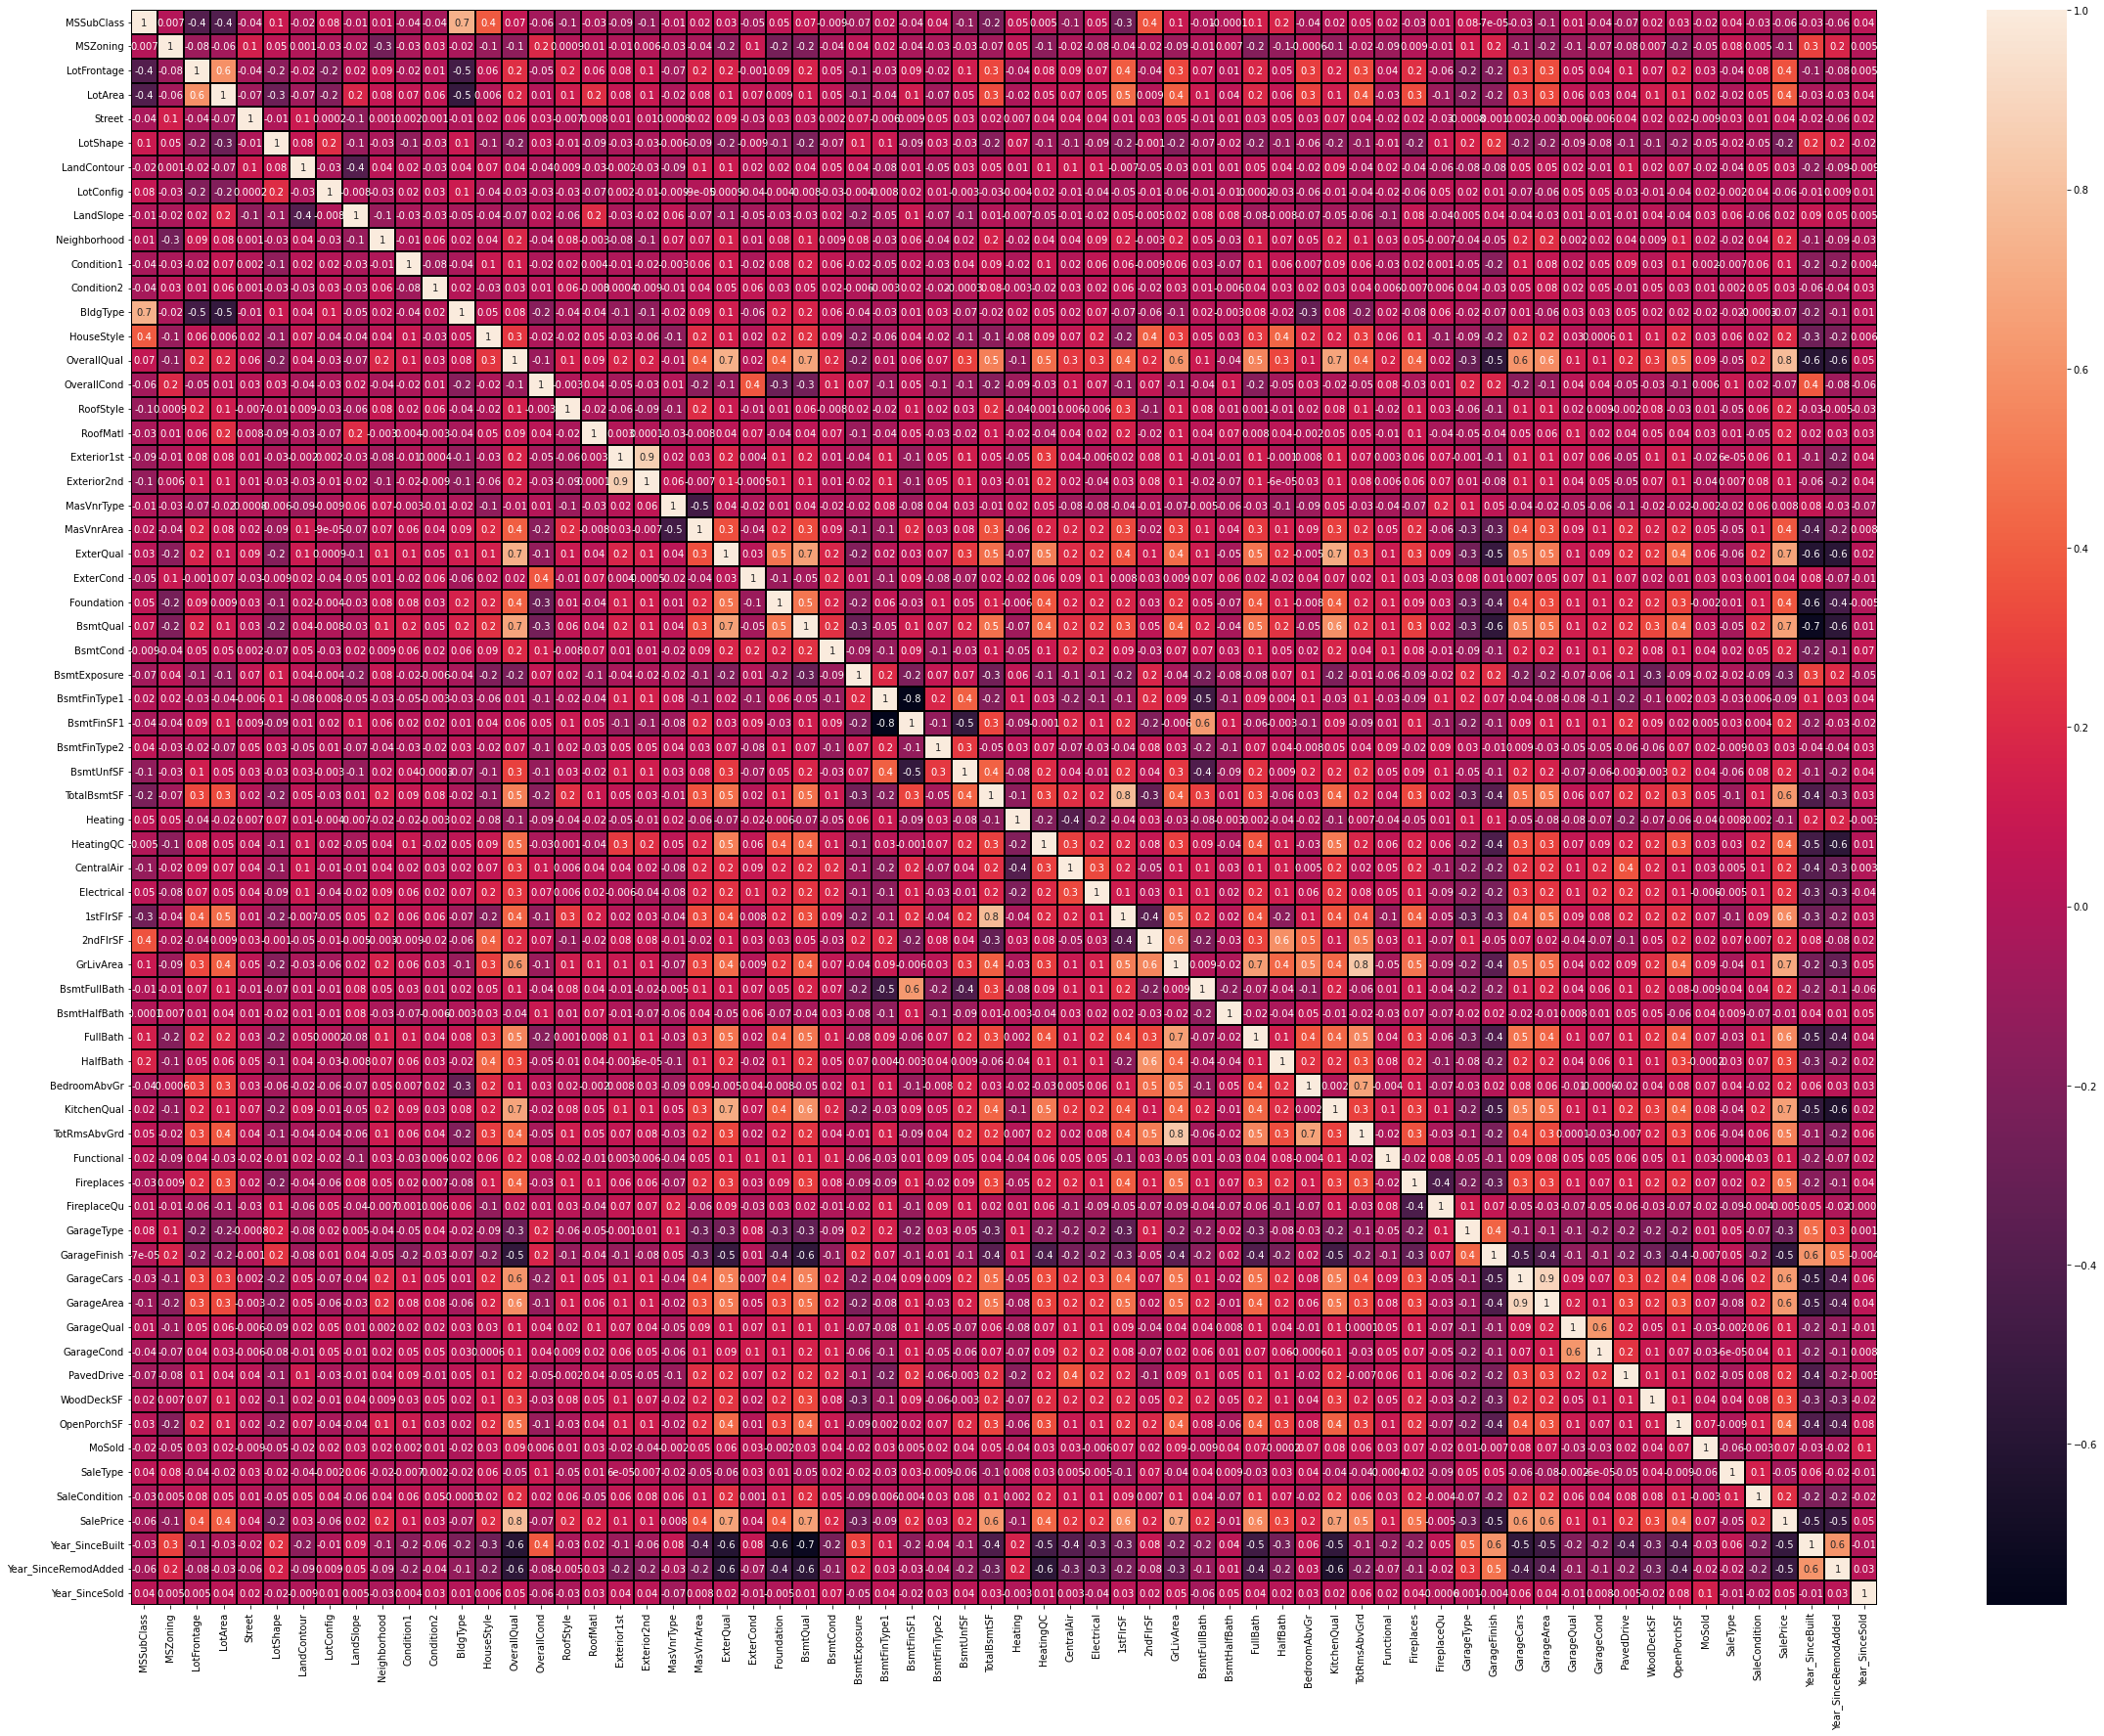

In [164]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='.1g')

Here I can clearly observe a multicolinearity issue in some of the features of train dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

<AxesSubplot:>

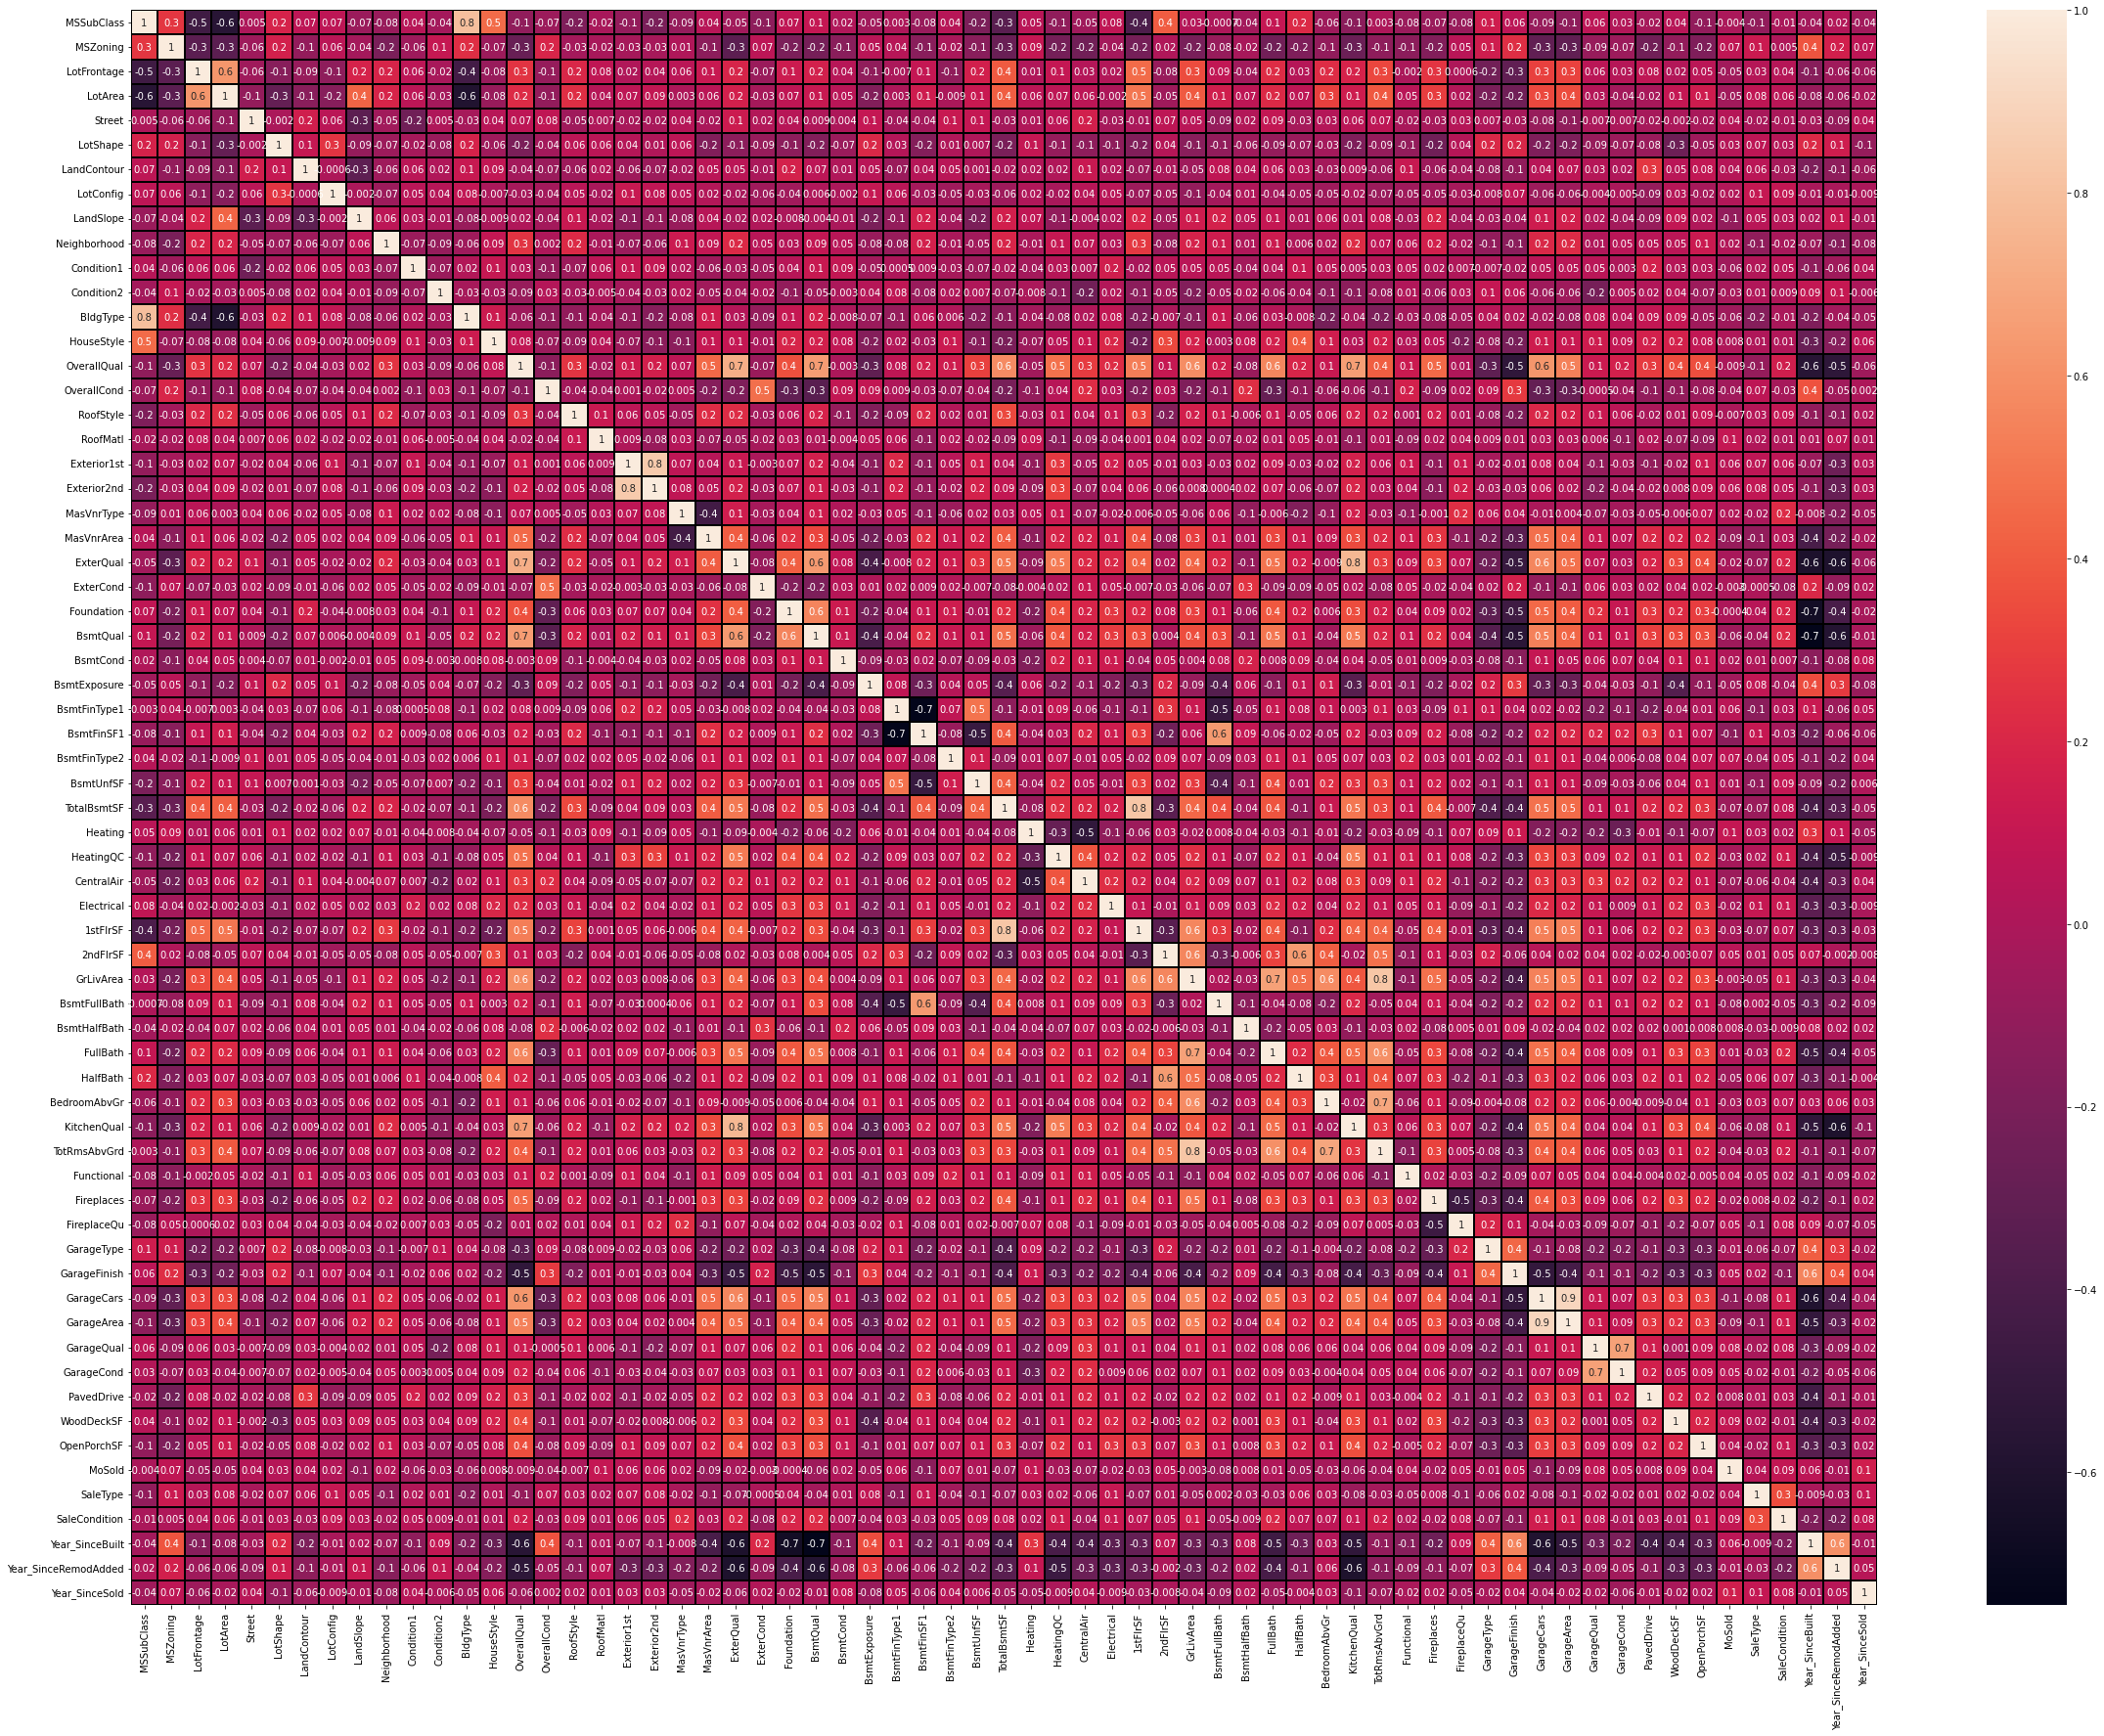

In [165]:
plt.figure(figsize=(40,30))
sns.heatmap(dff.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='.1g')

I can clearly observe a multicolinearity issue in some of the features of test dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

# Checking coorelation in barplot:-

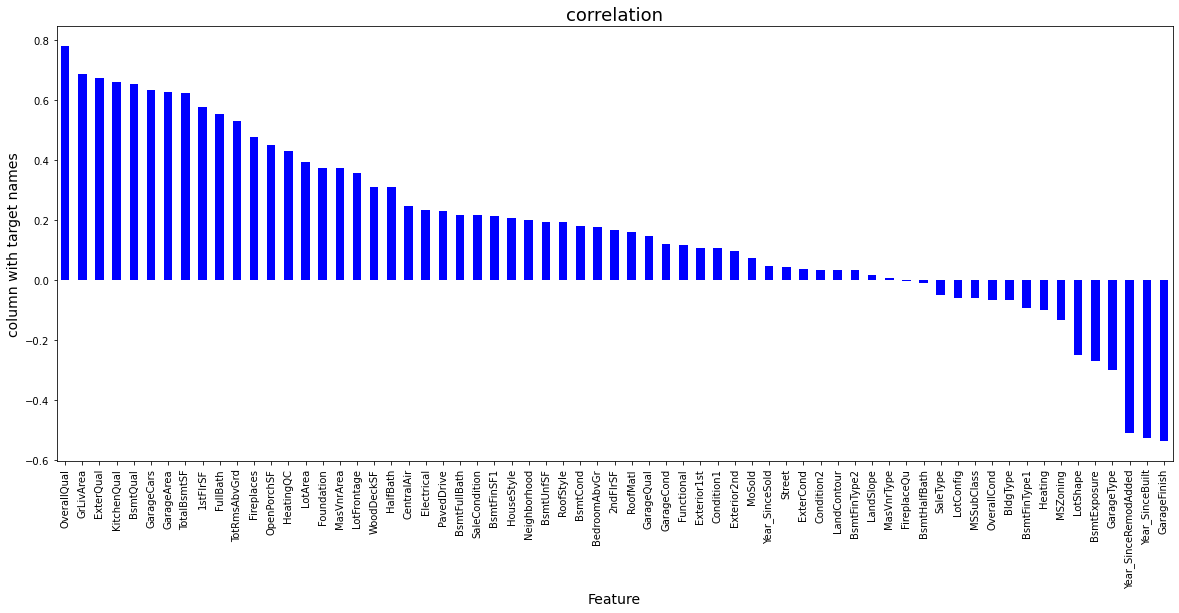

In [167]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here i can clearly see thatthat MasVnrType and ForeplaceQu are less correlated with target but let me keep those columns as it is and continue.

# Separating Features & label in train dataset:-

In [168]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

Here I have separated my target and independent columns.

# Scaling the data using standard scaler:-

In [169]:
#for train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [170]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageCond  \
0     0.318473   0.606420  -0.226126      0.142224  ...    0.110393   
1     0.318473   0.606420   3.295414     -0.024227  ...    0.110393   
2     0.318473  -1.220661  -0.226126      0.475125  ...    0.110393   
3     0.318473   0.606420  -0.226126      0.308675  ...    0.110393   
4     0.318473  -0.611634  -0.226126      0.308675  ...    0.110393   

   PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  SaleType  SaleCondition  \
0    0.291828   -0.960144     1.423871 -1.617822  0.330033       0.207932   
1    0.291828    0.783831     1.428474  1.361470  0.330033       0.207932   
2    0.291828    1.047285     1.208580 -0.128176  0.330033       0.207932   
3    0.291828   -0.960144     1.178672 -1.990233 -4.612004       0.207932   
4    0.291828    1.139237    -1.062308 -0.128176  0.330033       0.207932   

   Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
0        -0.162248              0.421565        0.605487  
1         0.041777              0.710356        0.605487  
2        -0.842331             -0.589202        0.605487  
3        -0.196252              0.373434       -1.651563  
4        -0.196252             -0.733598       -0.899213  

[5 rows x 65 columns]

This is the train data of independent variables after scaling.

# Scaling the data using standard scaler:-

In [171]:
#for test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [172]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.856054 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1    1.431981 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2   -0.856054 -0.287006     0.000000  0.524304  0.083045  0.745474   
3    0.287963 -0.287006     0.429998  0.548484  0.083045  0.745474   
4    0.059160 -0.287006     0.981605  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageCond  \
0    -2.566101  -2.001106  -0.226274      1.554460  ...    0.088121   
1     0.299297  -1.351136  -0.226274      1.554460  ...    0.088121   
2     0.299297   0.598774  -0.226274     -1.281387  ...    0.088121   
3    -3.998799   0.598774  -0.226274     -1.114572  ...    0.088121   
4     0.299297  -1.351136  -0.226274      1.387645  ...    0.088121   

   PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  SaleType  SaleCondition  \
0    0.281378    1.119038     0.718308  0.276960   0.23029       0.148654   
1    0.281378    0.813787    -1.111540  0.637997  -6.49418      -3.323909   
2    0.281378    1.153748     1.278346 -0.084077   0.23029       0.148654   
3    0.281378   -0.913570    -1.111540  0.276960   0.23029       0.148654   
4    0.281378    0.954066     0.218396 -1.889261   0.23029       0.148654   

   Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  
0        -1.065430             -1.031595        0.650908  
1        -0.374523              0.064496       -0.863555  
2        -0.933828             -0.782483       -0.863555  
3         1.040191              1.758454       -0.863555  
4        -1.131230             -1.081417       -0.106324  

[5 rows x 65 columns]

# Checking for multicolinearity issue using VIF:-

In [173]:
#for training

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.067640            MSSubClass
1       1.352170              MSZoning
2       2.025498           LotFrontage
3       2.630108               LotArea
4       1.107520                Street
..           ...                   ...
60      1.116701              SaleType
61      1.185820         SaleCondition
62      7.602846       Year_SinceBuilt
63      3.009138  Year_SinceRemodAdded
64      1.088397        Year_SinceSold

[65 rows x 2 columns]

In [175]:
X = X.drop(["GrLivArea"],axis=1)   #droping high Vif no

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.061810            MSSubClass
1       1.351163              MSZoning
2       2.021875           LotFrontage
3       2.627788               LotArea
4       1.101357                Street
..           ...                   ...
59      1.114972              SaleType
60      1.185357         SaleCondition
61      7.466229       Year_SinceBuilt
62      3.005775  Year_SinceRemodAdded
63      1.087908        Year_SinceSold

[64 rows x 2 columns]

Now we can see the multicolinearity issue is solved in train dataset.

# Checking for multicolinearity issue in test dataset using VIF:-

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.044002            MSSubClass
1       1.890469              MSZoning
2       2.307854           LotFrontage
3       4.354750               LotArea
4       1.515303                Street
..           ...                   ...
60      1.615088              SaleType
61      1.655469         SaleCondition
62      9.010463       Year_SinceBuilt
63      3.475541  Year_SinceRemodAdded
64      1.230818        Year_SinceSold

[65 rows x 2 columns]

In [179]:
#Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.000806            MSSubClass
1       1.890126              MSZoning
2       2.277536           LotFrontage
3       4.353950               LotArea
4       1.512032                Street
..           ...                   ...
59      1.611456              SaleType
60      1.636315         SaleCondition
61      8.581648       Year_SinceBuilt
62      3.471528  Year_SinceRemodAdded
63      1.230061        Year_SinceSold

[64 rows x 2 columns]

# Finding Best Random State and Accuracy:-

In [181]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [182]:
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod=RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    print('accuracy : ',acc,'random state :',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

accuracy :  0.8624324222235511 random state : 1
accuracy :  0.8211301351012615 random state : 2
accuracy :  0.8470770834630619 random state : 3
accuracy :  0.8210022756934909 random state : 4
accuracy :  0.7397378284170091 random state : 5
accuracy :  0.8699345045641127 random state : 6
accuracy :  0.8200969834377845 random state : 7
accuracy :  0.8492090920152879 random state : 8
accuracy :  0.824449432935068 random state : 9
accuracy :  0.8177380047708442 random state : 10
accuracy :  0.7000310829165086 random state : 11
accuracy :  0.8361506059805567 random state : 12
accuracy :  0.7861031253447767 random state : 13
accuracy :  0.8690126981205037 random state : 14
accuracy :  0.8013690933797539 random state : 15
accuracy :  0.7224243087415966 random state : 16
accuracy :  0.8683075784663741 random state : 17
accuracy :  0.8502964247531365 random state : 18
accuracy :  0.8772056798240326 random state : 19
accuracy :  0.767679224593125 random state : 20
accuracy :  0.8728462198902087 

In [183]:
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9009191560715581  on Random_state  50


Here i got the best accuracy and random state.

# Creating train test split:-

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithms:-

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:-

In [186]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)
#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.7667121853309
mean_squared_error: 615946285.8540052
mean_absolute_error: 16693.20854700855
root_mean_squared_error: 24818.26516608293

Cross validation score : 83.29921379463056

R2_Score - Cross Validation Score : 6.467498390700342


RandomForestRegressor is giving me 89.76% r2_score.

# ii)ExtraTreesRegressor:-

In [187]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 88.64651494577248
mean_squared_error: 683371471.3492131
mean_absolute_error: 16877.51031339031
root_mean_squared_error: 26141.37470274303

Cross validation score : 84.03627907708042

R2_Score - Cross Validation Score : 4.610235868692058


ExtraTreesRegressor is giving me 88.64% r2_score.

# iii)GradientBoostingRegressor:-

In [188]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.66728635306325
mean_squared_error: 561740313.7561958
mean_absolute_error: 15806.488414792702
root_mean_squared_error: 23701.061447880256

Cross validation score : 82.17345062643153

R2_Score - Cross Validation Score : 8.493835726631715


GradientBoostingRegressor is giving me 90.66% r2_score.

# iv)DecisionTreeRegressor:-

In [190]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 69.43798402861839
mean_squared_error: 1839541754.977208
mean_absolute_error: 28754.749287749288
root_mean_squared_error: 42889.879400357466

Cross validation score : 64.99093226173737

R2_Score - Cross Validation Score : 4.447051766881017


DecisionTreeRegressor is giving me 69.43% r2_score.

here after seeing the difference of model accuracy and cross validation score i found ExtraTreesClassifier as the best model.

# Hyper parameter tunning for best model:-

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

In [193]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

In [196]:
#Its take too much tim to load..already it takes 3-4hrs for run...so i take best parameters from myself

In [197]:
Best_mod=ExtraTreesRegressor(criterion='mae',max_features='sqrt',min_samples_split=2,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.00803141703516
mean_squared_error: 661611629.177072
mean_absolute_error: 16663.759629629625
RMSE value: 25721.812322950187


This is my model r2_score after tuning.I got 89% as r2_score which is gooddd!!!.Before model accuracy was 88.64% now after tunning it is 89%

# Saving the model:-

In [198]:
import joblib
joblib.dump(Best_mod,"House_Price_prediction.pkl")

['House_Price_prediction.pkl']

 have saved my model as House_Price_prediction.Using .pkl

# Predicting House Price for test dataset using Saved model:-

In [201]:
#for train

In [199]:
model=joblib.load("House_Price_prediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([138920.91, 179446.32, 120134.68, 238441.11, 134828.94,  93772.93,
        97373.91, 358474.29, 264034.71, 210915.92, 261215.49, 139135.85,
       196309.31, 216870.06, 169953.  , 203982.07, 157727.06, 214463.06,
       161068.5 , 159243.5 , 170749.86, 344818.14, 199540.07, 227460.81,
       118692.14, 138138.33, 161987.5 , 225852.37, 123540.5 , 133085.3 ,
       314200.76, 178923.03, 133625.57, 204110.  ,  94270.12, 198613.05,
       156845.23,  90998.3 , 163093.74, 204807.72, 218212.01, 217040.9 ,
       153290.02, 175149.5 , 192852.68, 192954.45, 255083.33, 191576.37,
       168118.78, 174597.71, 171341.5 ,  72464.79, 177675.5 , 120086.81,
       117100.34, 257442.31, 299085.29, 150607.  ,  97384.57, 214501.44,
       102738.42,  95774.92, 177612.89, 361282.55, 157478.81, 204564.08,
       317721.43,  82924.69, 153917.37, 161858.34, 199053.29, 208552.8 ,
        95157.28, 216290.02, 168111.82, 243309.36, 135368.75, 192744.1 ,
       250855.21, 138693.41, 504083.4 , 123627.65, 

In [200]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"]).T

Predicted    Actual
0    138920.91  137000.0
1    179446.32  168500.0
2    120134.68  115000.0
3    238441.11  280000.0
4    134828.94  140000.0
..         ...       ...
346  122330.23  110000.0
347  157611.63  137500.0
348  174925.36  170000.0
349  118592.39  139000.0
350  336725.06  361919.0

[351 rows x 2 columns]

We can see above are the predicted and actual values.

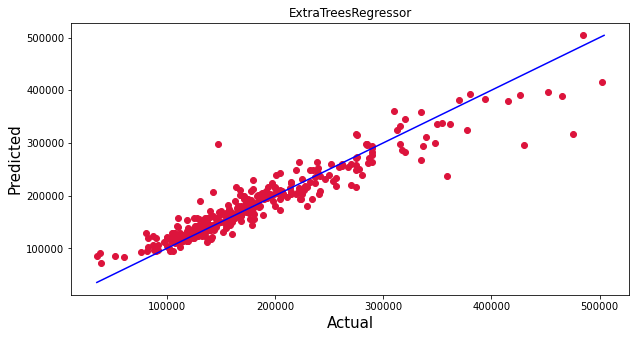

In [203]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Here we are Plotting Actual vs Predicted,To get better insight.

In [204]:
#for test dataset

In [205]:
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([338161.82, 223501.51, 247919.46, 169062.  , 245190.21,  84030.26,
       147207.61, 332175.23, 239310.53, 170052.03,  90861.76, 140647.5 ,
       123488.09, 205090.4 , 287281.29, 135495.01, 121003.75, 133548.  ,
       177645.13, 200908.21, 149387.  , 158520.37, 158870.  ,  98818.08,
       117435.95, 134901.  , 180037.79, 152512.  , 186934.  , 103960.93,
       148363.62, 199067.32, 224376.46, 166809.5 , 123503.09, 181078.47,
       203776.57, 122181.03, 170374.  , 151761.5 , 115998.4 , 296150.74,
       203564.18, 192709.99, 144303.4 , 126942.  , 130122.  , 104786.37,
       213140.15, 348045.44, 142211.08, 224261.6 , 111422.76, 102121.5 ,
       254744.36, 136280.5 , 141196.56, 189328.7 , 124400.43, 258248.89,
        98692.16, 209423.57, 133796.36, 151185.8 , 202768.52,  95001.  ,
       156794.  , 210997.37, 147362.84, 163266.  , 278385.94, 172865.48,
       166682.21, 149417.68, 146519.74, 230061.93, 319403.3 , 190205.75,
       300934.63, 145948.62, 221100.9 , 135118.75, 

In [206]:
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  338161.82
1  223501.51
2  247919.46
3  169062.00
4  245190.21
5   84030.26
6  147207.61
7  332175.23
8  239310.53
9  170052.03

In [207]:
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)